Домашнее задание 2 ниже в ноутбуке, делал все за раз извините :(

# Homework 1

## Выбор кейса

Я выбрал задачу определения языка по тексту. В ней может быть теоретически очень много классов (например, не только мировые языки, но и я зыки малых народов, вымершие языки и тд). Сложность задачи как раз, что есть много языков с почти полностью совпадающим алфавитом и схожими словами, грамматикой и так далее.

## Сбор данных

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

Я использовал датасет для нераспостраненнх языков:
1. https://huggingface.co/papers/2310.16248


У него лицензия Apache 2.0, то есть его можно использовать в комерческих целях

In [8]:
from datasets import load_dataset

data = load_dataset("cis-lmu/GlotStoryBook", "default")
data = data['train'].to_pandas()

In [13]:
data = data[['Text', 'Language']].rename(columns={'Text': 'text', 'Language': 'lang'})

In [17]:
all_data = data

Посмотрим какие языки в первом датасете

In [14]:
data

,text,lang
0,Atwero ngwec kede.,ach
1,Atwero pye kede.,ach
2,Atwero Myel Kede.,ach
3,Atwero kwang kede.,ach
4,Atwero lenge kede.,ach
...,...,...
79106,UMandla wagcina ethola indawa\nlapho azodansel...,zu
79107,UMandla unamandla amaningi\nngoba udla izithel...,zu
79108,UMandla waqala umbukiso\nwokudansa ebukelwa yi...,zu
79109,"Ukuzivocavoca kwakhe kwakhe\nkuhle kakhulu, ng...",zu


In [15]:
np.unique(data['lang'].values)

array(['ach', 'ada', 'adh', 'aeb', 'af', 'alz', 'am', 'anu', 'ar',
       'ar-diacritics', 'as', 'bem', 'bn', 'bo', 'bxk', 'ca', 'cce',
       'ckb', 'crk', 'csw', 'ctu', 'da', 'dag', 'de', 'dga', 'din', 'dje',
       'ee', 'el', 'en', 'eo', 'es', 'fa', 'fa-diacritics', 'fat', 'ff',
       'fr', 'gaa', 'gjn', 'gu', 'gur', 'guz', 'gyn', 'ha', 'hbs', 'hch',
       'hi', 'ht', 'hu', 'hus', 'hz', 'id', 'it', 'ja', 'jam', 'kam',
       'kdj', 'keo', 'ki', 'kj', 'kln', 'km', 'kmr', 'kn', 'ko', 'kok',
       'koo', 'kpz', 'kqn', 'kr', 'kri', 'kru', 'ktz', 'kwn', 'la', 'laj',
       'lg', 'lgg', 'lgg-official', 'lko', 'ln', 'loz', 'loz-na',
       'loz-zm', 'lsm', 'lt', 'luc', 'lue', 'lun', 'luo', 'lwg', 'mas',
       'mat', 'maz', 'mer', 'mfe', 'mg', 'mhi', 'mhw', 'miu', 'ml', 'mmc',
       'mnw', 'mqu', 'mr', 'ms', 'my', 'myx', 'naq', 'nb', 'nch', 'ne',
       'ng', 'nhe', 'nhw', 'nl', 'nle', 'nn', 'no', 'no-ipa', 'nr', 'nso',
       'nuj', 'ny', 'nyn', 'nyu', 'nzi', 'ocu', 'old', 'om', 'or'

In [184]:
lang2short = {
    'Arabic': 'ar',
    'Danish': 'da',
    'Dutch': 'nl',
    'English': 'en',
    'French': 'fr',
    'German': 'de',
    'Greek': 'el',
    'Hindi': 'hi',
    'Italian': 'it',
    'Kannada': 'kn',
    'Malayalam': 'ml',
    'Portugeese': 'pt',
    'Russian': 'ru',
    'Spanish': 'es',
    'Sweedish': 'sv',
    'Tamil': 'ta',
    'Turkish': 'tr'
}

In [185]:
data1['lang'] = data1['lang'].map(lang2short)

In [10]:
data1

,text,lang
0,"Nature, in the broadest sense, is the natural...",en
1,"""Nature"" can refer to the phenomena of the phy...",en
2,"The study of nature is a large, if not the onl...",en
3,"Although humans are part of nature, human acti...",en
4,[1] The word nature is borrowed from the Old F...,en
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,kn
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,kn
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,kn
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,kn


In [75]:
data2

,lang,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...
69996,el,"Ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτ..."
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...
69998,es,Se me rompió uno al sacarlo del cargador. Cali...


In [19]:
# Языки которые есть в первом датсете и во втором
set(np.unique(data2['lang'])) & set(np.unique(data1['lang']))

{'ar', 'de', 'el', 'en', 'es', 'fr', 'hi', 'it', 'nl', 'pt', 'ru', 'tr'}

In [24]:
# Языки которые есть в первом датсете, но нету во втором
set(np.unique(data1['lang'])) - set(np.unique(data2['lang']))

{'da', 'kn', 'ml', 'sv', 'ta'}

In [25]:
# Языки которые есть во втором датсете, но нету в первом
set(np.unique(data2['lang'])) - set(np.unique(data1['lang']))

{'bg', 'ja', 'pl', 'sw', 'th', 'ur', 'vi', 'zh'}

In [186]:
all_data = pd.concat([data1, data2], ignore_index=True)
all_data

,text,lang
0,"Nature, in the broadest sense, is the natural...",en
1,"""Nature"" can refer to the phenomena of the phy...",en
2,"The study of nature is a large, if not the onl...",en
3,"Although humans are part of nature, human acti...",en
4,[1] The word nature is borrowed from the Old F...,en
...,...,...
80332,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...,ja
80333,"Ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτ...",el
80334,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...,ur
80335,Se me rompió uno al sacarlo del cargador. Cali...,es


In [39]:
# Все языки которые есть в нашем основном датасете
np.unique(all_data['lang'])

array(['ar', 'bg', 'da', 'de', 'el', 'en', 'es', 'fr', 'hi', 'it', 'ja',
       'kn', 'ml', 'nl', 'pl', 'pt', 'ru', 'sv', 'sw', 'ta', 'th', 'tr',
       'ur', 'vi', 'zh'], dtype=object)

In [40]:
with open('main_langs.txt', 'w', encoding='utf-8') as f:
    for lang in np.unique(all_data['lang']):
        f.write(f"{lang}\n")

## Weak Supervision для увеличения размеченного датасета

Решил взять тексты из википедии, так там есть уже как бы готовая разметка (в урле). Также немного другой домен более длинных документов. Ссылка: https://huggingface.co/datasets/Cohere/wikipedia-2023-11-embed-multilingual-v3

Сделал в другом ноутбуке, попытался разметить llama и еще посимвольной классификацией, то есть когда мы смотрим на специфические символы для языка, и если их много то выбираем этот язык. Все эти методы работают плохо (если бы работлаи хорошо, то не надо было бы делать отдельную ml задачу под это)

### Разметка LLM

Смотри на llama_wiki.ipynb

In [35]:
pred_lang = [classify_language(text) for text in all_data['text'].values]


### Эвристики для определения языка

In [ ]:
labels2lang = {
    'ar': 'Arabic',
    'bg': 'Bulgarian',
    'de': 'German',
    'el': 'Greek',
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'hi': 'Hindi',
    'it': 'Italian',
    'ja': 'Japanese',
    'nl': 'Dutch',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'sw': 'Swahili',
    'th': 'Thai',
    'tr': 'Turkish',
    'ur': 'Urdu',
    'vi': 'Vietnamese',
    'zh': 'Chinese'
}

In [34]:
def classify_language(text):
    # Define unique characters for various languages
    language_symbols = {
        'Arabic': set('ابتثجحخدذرزسشصضطظعغفقكلمنهوي'),
        'Bulgarian': set('абвгдежзийклмнопрстуфхцчшщъьюя'),
        'Danish': set('abcdefghijklmnopqrstuvwxyzæøå'),
        'Dutch': set('abcdefghijklmnopqrstuvwxyz'),
        'English': set('abcdefghijklmnopqrstuvwxyz'),
        'French': set('abcdefghijklmnopqrstuvwxyzàâçéèêëîïôûùüÿœæ'),
        'German': set('abcdefghijklmnopqrstuvwxyzäöüß'),
        'Greek': set('αβγδεζηθικλμνξοπρστυφχψω'),
        'Hindi': set('अआइईउऊऋऌएऐओऔकखगघङचछजझञटठडढणतथदधनपफबभमयरलवशषसह'),
        'Italian': set('abcdefghijklmnopqrstuvwxyzàèéìíîòóùú'),
        'Japanese': set('あいうえおかきくけこさしすせそたちつてとなにぬねのまみむめもやゆよらりるれろわをん'),
        'Kannada': set('ಅಆಇಈಉಊಋಎಏಐಒಓಔಕಖಗಘಙಚಛಜಝಞಟಠಡಢಣತಥದಧನಪಫಬಭಮಯರಲವಶಷಸಹಳ'),
        'Malayalam': set('അആഇഈഉഊഋഎഏഐഒഓഔകഖഗഘങചഛജഝഞടഠഡഢണതഥദധനപഫബഭമയരലവശഷസഹളഴറ'),
        'Portuguese': set('abcdefghijklmnopqrstuvwxyzáàãâéêíóôõúç'),
        'Russian': set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя'),
        'Spanish': set('abcdefghijklmnopqrstuvwxyzáéíñóúü'),
        'Swedish': set('abcdefghijklmnopqrstuvwxyzåäö'),
        'Tamil': set('அஆஇஈஉஊஎஏஐஒஓஔகஙசஞடணதநபமயரலவழளறன'),
        'Turkish': set('abcdefghijklmnopqrstuvwxyzçğıöşü'),
        'Urdu': set('ابتثجحخدذرزسشصضطظعغفقكلمنہويے'),
        'Vietnamese': set('abcdefghijklmnopqrstuvwxyzăâđêôơưàáảãạầấẩẫậằắẳẵặèéẻẽẹềếểễệìíỉĩịòóỏõọồốổỗộờớởỡợùúủũụừứửữựỳýỷỹỵ'),
        'Chinese': set('的一是在不了有和人这中大为上个国我以要他时来用们生到作地于出就分对成会可主发年动'),
        'Thai': set('กขคฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮ'),
        'Polish': set('abcdefghijklmnopqrstuvwxyząćęłńóśźż'),
        'Swahili': set('abcdefghijklmnopqrstuvwxyz'),
    }

    text_set = set(text.lower())

    scores = {}
    for language, symbols in language_symbols.items():
        common_symbols = text_set & symbols
        scores[language] = len(common_symbols)

    detected_language = max(scores, key=scores.get)

    return detected_language if scores[detected_language] > 0 else 'Unknown'


In [36]:
Counter(pred_lang)

Counter({'Danish': 19690,
         'French': 6462,
         'German': 2782,
         'Polish': 3099,
         'Malayalam': 592,
         'Hindi': 3521,
         'Tamil': 469,
         'Portuguese': 3921,
         'Italian': 1779,
         'Spanish': 730,
         'Unknown': 12,
         'Greek': 3854,
         'Bulgarian': 4291,
         'Russian': 3397,
         'Vietnamese': 3492,
         'Turkish': 3570,
         'Swedish': 416,
         'Arabic': 4158,
         'Kannada': 369,
         'Chinese': 3447,
         'Thai': 3459,
         'Urdu': 3335,
         'Japanese': 3492})

Как мы видим, что английского вообще нету, потому что датский очень похож по символам на английский. Можно было бы сделать каое то домножение на апостореорную вероятность, но это уже не супер просто, надо подбирать + не факт что даст профит.

## Метрика качества и тестовый датасет

In [18]:
from collections import Counter

counts = Counter(all_data['lang'])
labels, frequencies = zip(*counts.items())


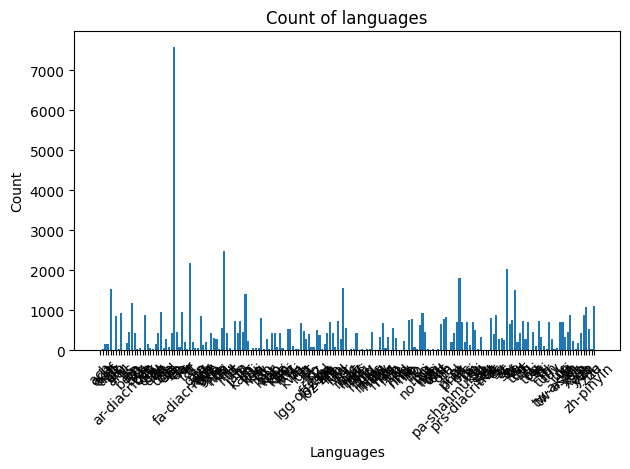

In [19]:
import matplotlib.pyplot as plt

plt.bar(labels, frequencies)

plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Count of languages')

plt.tight_layout()
plt.show()

### Метрика качества

In [5]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [6]:
import seaborn as sns

def evaluate_classification_model(y_true, y_pred, labels=None, plot=True):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    return {
        'accuracy': acc,
        'f1_weighted': f1,
        'classification_report': report,
        'confusion_matrix': cm
    }

Есть стандартные метрики для многоклассовой классификации:
1. Accuracy
2. По классовый Precision, Recall
3. F1, Precision, Recall - micro, macro, weighted
4. Confusion matrix

Accuracy плохо подходит, так как мы видим у некоторых языков сильный дисбаланс классиов, хотя для многоклассовой это не так критично.

Поскольку нас интересует как модель различает похожие языки, то можем использовать Confusion matrix, однако по ней сложно однозначно принять решение о выкатке в прод, например, посольку может легко возникунть ситуация когда на одних языках матрица стала лучше работать а на других хуже, но это решеие можно принять с помощью каких то продуктовых знаний. Например, c помощью продуктовых знаний и кворума о принятии решений.

За основную примнимаем F1 weighted, так как это некий баланс между Precision и Recall, также учитвающие распределение классов. А остальные Accuracy, Precision, Precision, Confusion matrix за второстепенные

## Подготовка к обучению 

## Предобработать данные

Удаляем дубликаты, тем самым спасаемся от лика в тесте

In [22]:
f"Full len: {all_data.shape[0]}"

'Full len: 79111'

In [23]:
f"After duplicates len: {all_data['text'].drop_duplicates().shape[0]}"

'After duplicates len: 77188'

### Вычищаем датасет

Пропуски есть

In [24]:
all_data[pd.isna(all_data['text'])]

,text,lang
298,None,aeb
300,None,aeb
302,None,aeb
304,None,aeb
306,None,aeb
...,...,...
78903,None,zu
78907,None,zu
78910,None,zu
78978,None,zu


In [25]:
all_data = all_data[~pd.isna(all_data['text'])]

In [26]:
all_data[pd.isna(all_data['lang'])]

,text,lang


Вычищаем примеры где больше 30% цифр, поскольку это может добавлять шум

In [27]:
def more_than_30_percent_digits(s):
    if not s:
        return False
    total = len(s)
    digit_count = sum(c.isdigit() for c in s)
    return (digit_count / total) > 0.3

def less_than_30_percent_digits(s):
    if not s:
        return False
    total = len(s)
    digit_count = sum(c.isdigit() for c in s)
    return (digit_count / total) < 0.3

all_data[all_data['text'].apply(more_than_30_percent_digits)]

,text,lang
21528,મારો ફોન નમબર ૦૩૩૩૪૨૬૫૮૭ છે.,gu
48594,Enamba y’esimu yange\n0752-342658.,nuj
50983,Lakkofsi bilbilaakoo\n033-3426587.,om
75898,我電話號碼係(033) 342-6587。,yue
76852,我的电话号码是(033) 342-6587。,zh
77533,我的電話號碼是(033) 342-6587。,zh-pinyin


In [28]:
all_data = all_data[all_data['text'].apply(less_than_30_percent_digits)]


Вычищаем слова меньше 5 символов

In [29]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
import pandas as pd

In [30]:
all_data = all_data[all_data['text'].str.len() >= 5]

### Разбиение датасета на обучающий и тестовый

Вообще хорошо бы разбить еще на val датасет, но сделаем как описано в задании

Сделаем stratified разбиение, посольку некоторые языки не сблансированы

In [42]:
data_test.shape

(7854, 4)

In [31]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(
    all_data, test_size=0.1, random_state=29, stratify=all_data['lang']
)

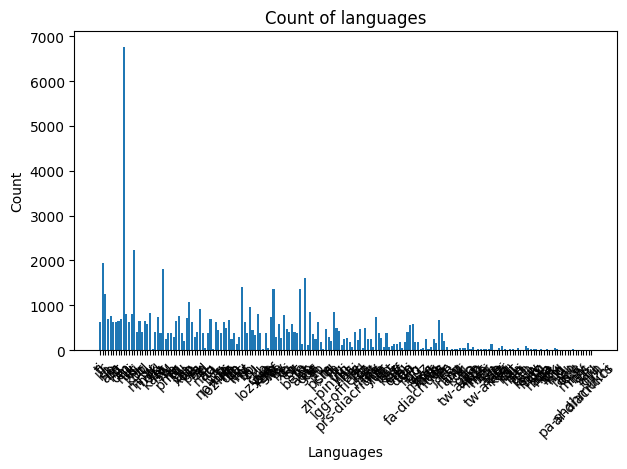

In [32]:
counts = Counter(data_train['lang'])
labels, frequencies = zip(*counts.items())

plt.bar(labels, frequencies)

plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Count of languages')

plt.tight_layout()
plt.show()

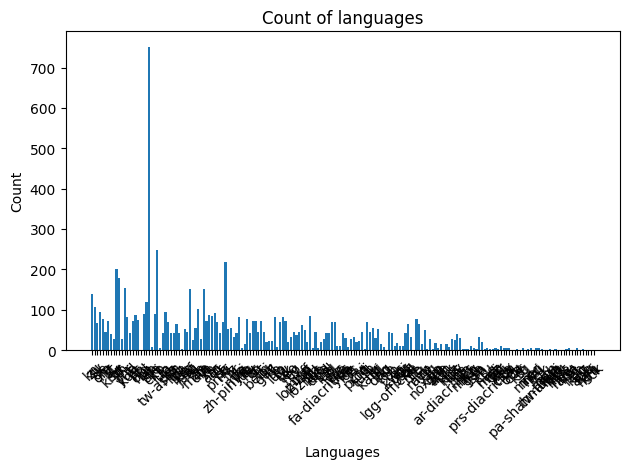

In [33]:
counts = Counter(data_test['lang'])
labels, frequencies = zip(*counts.items())

plt.bar(labels, frequencies)

plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Count of languages')

plt.tight_layout()
plt.show()

### Аугментация

Меняем слова местами

In [39]:
import random

def random_swap(text, n_swaps=1):
    words = text.split()
    if len(words) < 2:
        return text
    for _ in range(n_swaps):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

In [40]:
sample_frac = 0.1
n_swaps = 2

swap_df = data_train.sample(frac=sample_frac, random_state=29)
swap_df['text'] = swap_df['text'].apply(lambda x: random_swap(x, n_swaps=n_swaps))


Для нашей задачи отлично подходит аугментация перевода на другой язык и обратно

In [195]:
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

model = model.to('cuda')

In [196]:
from tqdm import tqdm

def translate_text(texts, src_lang, tgt_lang, batch_size=16):
    results = []
    tokenizer.src_lang = src_lang

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i + batch_size]

        encoded = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda')

        generated = model.generate(
            **encoded,
            forced_bos_token_id=tokenizer.get_lang_id(tgt_lang)
        )

        decoded = tokenizer.batch_decode(generated, skip_special_tokens=True)
        results.extend(decoded)

    return results

In [197]:
sample_frac = 0.1

translate_df = data_train.sample(frac=sample_frac, random_state=29)

supported_langs = list(np.unique(all_data['lang'].values))

In [198]:
texts = translate_df['text'].tolist()
langs = translate_df['lang'].tolist()

augmented_rows = []
for src_lang in set(langs):
    subset = translate_df[translate_df['lang'] == src_lang]
    texts_subset = subset['text'].tolist()
    
    possible_targets = list(set(supported_langs) - {src_lang})
    tgt_lang = random.choice(possible_targets)

    translated = translate_text(texts_subset, src_lang, tgt_lang)
    back_translated = translate_text(translated, tgt_lang, src_lang)

    for original_row, bt_text in zip(subset.itertuples(), back_translated):
        augmented_rows.append({'text': bt_text, 'lang': src_lang})
    
translate_df = pd.DataFrame(augmented_rows)

100%|██████████| 23/23 [00:43<00:00,  1.91s/it]


In [43]:
data_train = pd.concat([data_train, swap_df, translate_df], ignore_index=True)

In [44]:
data_train.to_csv('train_data.csv', index=None)

In [76]:
data_test.to_csv('test_data.csv', index=None)

In [4]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

## Baseline

Для бейзлайна выберес обычную линейную модель: Логистическую классификацию над bag of chars

То есть мы будем векторизовать не слова а символы или несколько подряд идущих символов, поскольку нам не обязательно понимать все слова целиком а только часть (например буквы специфичные буквы для этого языка). И также если попадутся новые слова мы их разберем и сможем применить модель. 

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [52]:
data_train

,text,lang
0,ኣብ ቐጻሊ እንታይ ከም ዝፍጠር ኣይፈልጥን እየ። መደበይ ናብ ካልእ ቤት ...,ti
1,« C'est maman qui fait le meilleur porridge ! ...,fr
2,ಹುಳಿಯಾಳ ಬೀಜಗಳ ಸೂಪರ್ ಬೀಜದರ್ಶನ\n\nನಮಸ್ಕಾರ!. ನಾನು...,kn
3,ಈ ಮಹಿಳೆ ಭಾವನೆ ಏನಿದೆ? \n\nಬಹುಶಃ ಆಕೆಗೆ ನಾಚಿಕೆ ಆಗ...,kn
4,To små føtter for å sparke.,nb
...,...,...
77746,我跟朋友一起跳舞很好玩。 我妈妈带我和我堂哥去折箭组织办的一个圆舞会。 我看到很多我认识的人。,zh
77747,তো বললেন “চমৎকার! এটা দিয়ে দাদু আমি থ্যাঙ্ক দে...,bn
77748,ili ...kaj grandas. ĝuste,eo
77749,Одного Аніта. Зімбегвіре ліжка. “Ліниве дівчис...,uk


In [46]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(data_train['text'])
X_test_vec = vectorizer.transform(data_test['text'])

In [ ]:
clf = LogisticRegression(max_iter=100, solver='saga')
clf.fit(X_train_vec, data_train['lang'])

In [117]:
y_pred = clf.predict(X_test_vec)

In [118]:
y_pred

array(['kn', 'zu', 'de', ..., 'en', 'loz-na', 'zu'], dtype=object)

In [119]:
data_test['lang']

29849     kn
78316     zu
64147     sv
8382      de
50600     om
        ... 
70082     tn
72034     uk
14397     en
66774    tet
66827    tet
Name: lang, Length: 7854, dtype: object

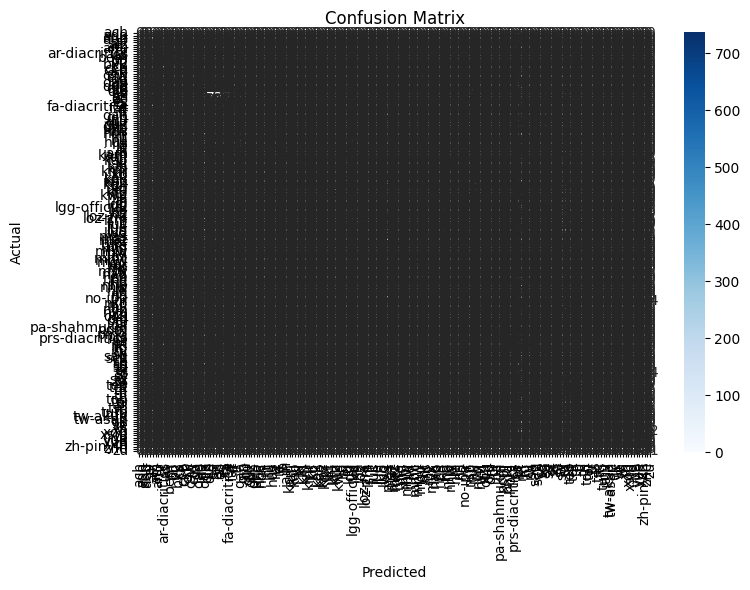

In [120]:
stat = evaluate_classification_model(data_test['lang'], y_pred, labels=clf.classes_)

In [66]:
stat

{'accuracy': 0.5289024700789406,
 'f1_weighted': 0.4349361666141123,
 'classification_report': {'ach': {'precision': 0.0,
   'recall': 0.0,
   'f1-score': 0.0,
   'support': 1.0},
  'ada': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0},
  'adh': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14.0},
  'aeb': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0},
  'af': {'precision': 0.3129251700680272,
   'recall': 0.6052631578947368,
   'f1-score': 0.4125560538116592,
   'support': 152.0},
  'alz': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
  'am': {'precision': 1.0,
   'recall': 0.21176470588235294,
   'f1-score': 0.34951456310679613,
   'support': 85.0},
  'anu': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
  'ar': {'precision': 0.9130434782608695,
   'recall': 0.9130434782608695,
   'f1-score': 0.9130434782608695,
   'support': 92.0},
  'ar-diacritics': {'precision': 0.0,
   'recall': 0

Выбили 0.4349 по F1 weighted, неплохо продолжаем)

## Модель

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_train['labels'] = le.fit_transform(data_train['lang'])

data_test['labels'] = le.transform(data_test['lang'])

In [6]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(data_train[['text', 'labels']])
val_dataset = Dataset.from_pandas(data_test[['text', 'labels']])

In [104]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_checkpoint = "google-bert/bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [12]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Map: 100%|██████████| 7854/7854 [00:00<00:00, 13394.45 examples/s]


In [111]:
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

model = model.to('cuda')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "precision_weighted": precision_score(labels, preds, average="weighted", zero_division=0),
        "recall_weighted": recall_score(labels, preds, average="weighted", zero_division=0),
        "f1_weighted": f1_score(labels, preds, average="weighted", zero_division=0),
    }

In [113]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="steps",
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    #compute_metrics=compute_metrics,
    report_to="wandb",
    
    fp16=True,
)

In [114]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [115]:
trainer.train()

  3%|▎         | 164/6075 [01:41<1:00:40,  1.62it/s]
                                                 
  1%|          | 51/6075 [00:04<07:53, 12.73it/s]]

{'loss': 4.9174, 'learning_rate': 1.9845267489711937e-05, 'epoch': 0.04}


                                                 
  2%|▏         | 101/6075 [00:07<07:50, 12.71it/s]

{'loss': 3.9245, 'learning_rate': 1.9680658436213993e-05, 'epoch': 0.08}


                                                  
  9%|▉         | 551/6075 [01:21<07:16, 12.66it/s]

{'loss': 3.1912, 'learning_rate': 1.951604938271605e-05, 'epoch': 0.12}


                                                  
  3%|▎         | 201/6075 [00:15<07:41, 12.74it/s]

{'loss': 2.7502, 'learning_rate': 1.935144032921811e-05, 'epoch': 0.16}


                                                  
  9%|▉         | 551/6075 [01:29<07:16, 12.66it/s]

{'loss': 2.3652, 'learning_rate': 1.9186831275720167e-05, 'epoch': 0.21}


                                                  
  5%|▍         | 301/6075 [00:23<07:34, 12.71it/s]

{'loss': 2.106, 'learning_rate': 1.9022222222222223e-05, 'epoch': 0.25}


                                                  
  9%|▉         | 551/6075 [01:37<07:16, 12.66it/s]

{'loss': 1.9627, 'learning_rate': 1.885761316872428e-05, 'epoch': 0.29}


                                                  
  7%|▋         | 401/6075 [00:31<07:25, 12.74it/s]

{'loss': 1.8001, 'learning_rate': 1.869300411522634e-05, 'epoch': 0.33}


                                                  
  9%|▉         | 551/6075 [01:45<07:16, 12.66it/s]

{'loss': 1.6269, 'learning_rate': 1.8528395061728397e-05, 'epoch': 0.37}


                                                  
  8%|▊         | 501/6075 [00:39<07:22, 12.61it/s]

{'loss': 1.5717, 'learning_rate': 1.8363786008230453e-05, 'epoch': 0.41}


                                                  
  9%|▉         | 551/6075 [01:53<07:16, 12.66it/s]

{'loss': 1.4479, 'learning_rate': 1.819917695473251e-05, 'epoch': 0.45}


                                                  
 10%|▉         | 601/6075 [00:46<07:12, 12.65it/s]

{'loss': 1.3245, 'learning_rate': 1.803456790123457e-05, 'epoch': 0.49}


                                                  
  9%|▉         | 551/6075 [02:01<07:16, 12.66it/s]

{'loss': 1.3129, 'learning_rate': 1.7869958847736627e-05, 'epoch': 0.53}


                                                  
 12%|█▏        | 701/6075 [00:54<07:03, 12.69it/s]

{'loss': 1.2223, 'learning_rate': 1.7705349794238683e-05, 'epoch': 0.58}


                                                  
  9%|▉         | 551/6075 [02:08<07:16, 12.66it/s]

{'loss': 1.109, 'learning_rate': 1.7540740740740743e-05, 'epoch': 0.62}


                                                  
 13%|█▎        | 801/6075 [01:02<06:57, 12.64it/s]

{'loss': 1.1634, 'learning_rate': 1.73761316872428e-05, 'epoch': 0.66}


                                                  
  9%|▉         | 551/6075 [02:16<07:16, 12.66it/s]

{'loss': 1.0731, 'learning_rate': 1.7211522633744857e-05, 'epoch': 0.7}


                                                  
 15%|█▍        | 901/6075 [01:10<06:48, 12.68it/s]

{'loss': 1.0192, 'learning_rate': 1.7046913580246917e-05, 'epoch': 0.74}


                                                  
  9%|▉         | 551/6075 [02:24<07:16, 12.66it/s]

{'loss': 0.9617, 'learning_rate': 1.688230452674897e-05, 'epoch': 0.78}


                                                  
 16%|█▋        | 1001/6075 [01:18<06:40, 12.67it/s][A

{'loss': 0.9379, 'learning_rate': 1.671769547325103e-05, 'epoch': 0.82}


                                                   
  9%|▉         | 551/6075 [02:32<07:16, 12.66it/s]

{'loss': 0.8764, 'learning_rate': 1.6553086419753087e-05, 'epoch': 0.86}


                                                   
 18%|█▊        | 1101/6075 [01:26<06:31, 12.69it/s][A

{'loss': 0.8641, 'learning_rate': 1.6388477366255143e-05, 'epoch': 0.91}


                                                   
  9%|▉         | 551/6075 [02:40<07:16, 12.66it/s]

{'loss': 0.8234, 'learning_rate': 1.6223868312757203e-05, 'epoch': 0.95}


                                                   
 20%|█▉        | 1201/6075 [01:33<06:26, 12.62it/s][A

{'loss': 0.76, 'learning_rate': 1.605925925925926e-05, 'epoch': 0.99}


 20%|██        | 1215/6075 [01:34<06:17, 12.88it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  5%|▍         | 6/123 [00:00<00:02, 51.01it/s]

 10%|▉         | 12/123 [00:00<00:02, 45.33it/s]

 14%|█▍        | 17/123 [00:00<00:02, 43.88it/s]

 18%|█▊        | 22/123 [00:00<00:02, 43.20it/s]

 22%|██▏       | 27/123 [00:00<00:02, 42.78it/s]

 26%|██▌       | 32/123 [00:00<00:02, 42.57it/s]

 30%|███       | 37/123 [00:00<00:02, 42.40it/s]

 34%|███▍      | 42/123 [00:00<00:01, 42.27it/s]

 38%|███▊      | 47/123 [00:01<00:01, 42.09it/s]

 42%|████▏     | 52/123 [00:01<00:01, 42.08it/s]

 46%|████▋     | 57/123 [00:01<00:01, 41.95it/s]

 50%|█████     | 62/123 [00:01<00:01, 41.98it/s]

 54%|█████▍    | 67/123 [00:01<00:01, 41.97it/s]

 59%|█████▊    | 72/123 [00:01<00:01, 41.92it/s]

 63%|██████▎   | 77/123 [00:01<00:01, 41.91it/s]

 67%|██████▋   | 82/123 [00:01<00:00, 41.86it/s]

 71%|███████   | 87/123 [00:02<00:00, 41.88it/s]

 75%|███████▍  | 92/123 [00:02<00:00, 41.82it/s]

 79%|██

{'eval_loss': 0.7148299813270569, 'eval_accuracy': 0.8445378151260504, 'eval_precision_weighted': 0.8249829360501314, 'eval_recall_weighted': 0.8445378151260504, 'eval_f1_weighted': 0.8198328382783693, 'eval_runtime': 2.9443, 'eval_samples_per_second': 2667.506, 'eval_steps_per_second': 41.775, 'epoch': 1.0}


                                                      
  9%|▉         | 551/6075 [04:03<07:16, 12.66it/s]

{'loss': 0.7602, 'learning_rate': 1.5894650205761317e-05, 'epoch': 1.03}


                                                   
  9%|▉         | 551/6075 [04:07<07:16, 12.66it/s]

{'loss': 0.6861, 'learning_rate': 1.5730041152263377e-05, 'epoch': 1.07}


                                                   
  9%|▉         | 551/6075 [04:11<07:16, 12.66it/s]

{'loss': 0.6895, 'learning_rate': 1.5565432098765433e-05, 'epoch': 1.11}


                                                   
  9%|▉         | 551/6075 [04:15<07:16, 12.66it/s]

{'loss': 0.6392, 'learning_rate': 1.540082304526749e-05, 'epoch': 1.15}


                                                   
  9%|▉         | 551/6075 [04:19<07:16, 12.66it/s]

{'loss': 0.6378, 'learning_rate': 1.5236213991769548e-05, 'epoch': 1.19}


                                                   
  9%|▉         | 551/6075 [04:23<07:16, 12.66it/s]

{'loss': 0.6108, 'learning_rate': 1.5071604938271607e-05, 'epoch': 1.23}


                                                   
  9%|▉         | 551/6075 [04:26<07:16, 12.66it/s]

{'loss': 0.5724, 'learning_rate': 1.4906995884773663e-05, 'epoch': 1.28}


                                                   
  9%|▉         | 551/6075 [04:30<07:16, 12.66it/s]

{'loss': 0.6098, 'learning_rate': 1.4742386831275722e-05, 'epoch': 1.32}


                                                   
  9%|▉         | 551/6075 [04:34<07:16, 12.66it/s]

{'loss': 0.5828, 'learning_rate': 1.457777777777778e-05, 'epoch': 1.36}


                                                   
  9%|▉         | 551/6075 [04:38<07:16, 12.66it/s]

{'loss': 0.5519, 'learning_rate': 1.4413168724279835e-05, 'epoch': 1.4}


                                                   
  9%|▉         | 551/6075 [04:42<07:16, 12.66it/s]

{'loss': 0.547, 'learning_rate': 1.4248559670781893e-05, 'epoch': 1.44}


                                                   
  9%|▉         | 551/6075 [04:46<07:16, 12.66it/s]

{'loss': 0.5277, 'learning_rate': 1.4083950617283952e-05, 'epoch': 1.48}


                                                   
  9%|▉         | 551/6075 [04:50<07:16, 12.66it/s]

{'loss': 0.5184, 'learning_rate': 1.3919341563786008e-05, 'epoch': 1.52}


                                                   
  9%|▉         | 551/6075 [04:54<07:16, 12.66it/s]

{'loss': 0.5459, 'learning_rate': 1.3754732510288067e-05, 'epoch': 1.56}


                                                   
  9%|▉         | 551/6075 [04:58<07:16, 12.66it/s]

{'loss': 0.5047, 'learning_rate': 1.3590123456790125e-05, 'epoch': 1.6}


                                                   
  9%|▉         | 551/6075 [05:02<07:16, 12.66it/s]

{'loss': 0.4955, 'learning_rate': 1.3425514403292182e-05, 'epoch': 1.65}


                                                   
  9%|▉         | 551/6075 [05:06<07:16, 12.66it/s]

{'loss': 0.4569, 'learning_rate': 1.326090534979424e-05, 'epoch': 1.69}


                                                   
 35%|███▍      | 2102/6075 [03:59<05:12, 12.73it/s][A

{'loss': 0.4542, 'learning_rate': 1.3096296296296298e-05, 'epoch': 1.73}


                                                   
  9%|▉         | 551/6075 [05:13<07:16, 12.66it/s]

{'loss': 0.4424, 'learning_rate': 1.2931687242798353e-05, 'epoch': 1.77}


                                                   
 36%|███▌      | 2202/6075 [04:07<05:04, 12.72it/s][A

{'loss': 0.4368, 'learning_rate': 1.2767078189300412e-05, 'epoch': 1.81}


                                                   
  9%|▉         | 551/6075 [05:21<07:16, 12.66it/s]

{'loss': 0.4603, 'learning_rate': 1.260246913580247e-05, 'epoch': 1.85}


                                                   
  9%|▉         | 551/6075 [05:25<07:16, 12.66it/s]

{'loss': 0.4321, 'learning_rate': 1.2437860082304527e-05, 'epoch': 1.89}


                                                   
  9%|▉         | 551/6075 [05:29<07:16, 12.66it/s]

{'loss': 0.4175, 'learning_rate': 1.2273251028806585e-05, 'epoch': 1.93}


                                                   
  9%|▉         | 551/6075 [05:33<07:16, 12.66it/s]

{'loss': 0.4262, 'learning_rate': 1.2108641975308643e-05, 'epoch': 1.98}


 40%|████      | 2430/6075 [04:25<04:42, 12.89it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  5%|▍         | 6/123 [00:00<00:02, 51.57it/s]

 10%|▉         | 12/123 [00:00<00:02, 45.48it/s]

 14%|█▍        | 17/123 [00:00<00:02, 44.14it/s]

 18%|█▊        | 22/123 [00:00<00:02, 43.40it/s]

 22%|██▏       | 27/123 [00:00<00:02, 42.80it/s]

 26%|██▌       | 32/123 [00:00<00:02, 42.59it/s]

 30%|███       | 37/123 [00:00<00:02, 42.48it/s]

 34%|███▍      | 42/123 [00:00<00:01, 42.39it/s]

 38%|███▊      | 47/123 [00:01<00:01, 42.25it/s]

 42%|████▏     | 52/123 [00:01<00:01, 42.24it/s]

 46%|████▋     | 57/123 [00:01<00:01, 42.20it/s]

 50%|█████     | 62/123 [00:01<00:01, 42.25it/s]

 54%|█████▍    | 67/123 [00:01<00:01, 42.17it/s]

 59%|█████▊    | 72/123 [00:01<00:01, 42.18it/s]

 63%|██████▎   | 77/123 [00:01<00:01, 42.18it/s]

 67%|██████▋   | 82/123 [00:01<00:00, 42.10it/s]

 71%|███████   | 87/123 [00:02<00:00, 42.12it/s]

 75%|███████▍  | 92/123 [00:02<00:00, 42.22it/s]

 79%|██

{'eval_loss': 0.4215667247772217, 'eval_accuracy': 0.8953399541634836, 'eval_precision_weighted': 0.8734809621086234, 'eval_recall_weighted': 0.8953399541634836, 'eval_f1_weighted': 0.8792536020801865, 'eval_runtime': 2.9321, 'eval_samples_per_second': 2678.609, 'eval_steps_per_second': 41.949, 'epoch': 2.0}


                                                      
 40%|████      | 2451/6075 [05:42<24:04,  2.51it/s][A

{'loss': 0.414, 'learning_rate': 1.19440329218107e-05, 'epoch': 2.02}


                                                   
 41%|████      | 2501/6075 [05:46<04:41, 12.69it/s][A

{'loss': 0.3631, 'learning_rate': 1.1779423868312758e-05, 'epoch': 2.06}


                                                   
 42%|████▏     | 2551/6075 [05:50<04:37, 12.69it/s][A

{'loss': 0.3678, 'learning_rate': 1.1614814814814817e-05, 'epoch': 2.1}


                                                   
 43%|████▎     | 2601/6075 [05:54<04:33, 12.72it/s][A

{'loss': 0.3836, 'learning_rate': 1.1450205761316873e-05, 'epoch': 2.14}


                                                   
 44%|████▎     | 2651/6075 [05:57<04:31, 12.62it/s][A

{'loss': 0.3504, 'learning_rate': 1.1285596707818932e-05, 'epoch': 2.18}


                                                   
 44%|████▍     | 2701/6075 [06:01<04:27, 12.62it/s][A

{'loss': 0.3386, 'learning_rate': 1.112098765432099e-05, 'epoch': 2.22}


                                                   
 45%|████▌     | 2751/6075 [06:05<04:21, 12.69it/s][A

{'loss': 0.3632, 'learning_rate': 1.0956378600823045e-05, 'epoch': 2.26}


                                                   
  9%|▉         | 551/6075 [07:19<07:16, 12.66it/s]

{'loss': 0.332, 'learning_rate': 1.0791769547325103e-05, 'epoch': 2.3}


                                                   
 47%|████▋     | 2851/6075 [06:13<04:14, 12.68it/s][A

{'loss': 0.3539, 'learning_rate': 1.0627160493827162e-05, 'epoch': 2.35}


                                                   
  9%|▉         | 551/6075 [07:27<07:16, 12.66it/s]

{'loss': 0.3218, 'learning_rate': 1.0462551440329218e-05, 'epoch': 2.39}


                                                   
 49%|████▊     | 2951/6075 [06:21<04:06, 12.68it/s][A

{'loss': 0.3165, 'learning_rate': 1.0297942386831277e-05, 'epoch': 2.43}


                                                   
  9%|▉         | 551/6075 [07:35<07:16, 12.66it/s]

{'loss': 0.2963, 'learning_rate': 1.0133333333333335e-05, 'epoch': 2.47}


                                                   
 50%|█████     | 3051/6075 [06:29<03:58, 12.68it/s][A

{'loss': 0.3101, 'learning_rate': 9.968724279835392e-06, 'epoch': 2.51}


                                                   
  9%|▉         | 551/6075 [07:43<07:16, 12.66it/s]

{'loss': 0.2984, 'learning_rate': 9.80411522633745e-06, 'epoch': 2.55}


                                                   
 52%|█████▏    | 3151/6075 [06:37<03:50, 12.69it/s][A

{'loss': 0.3044, 'learning_rate': 9.639506172839507e-06, 'epoch': 2.59}


                                                   
  9%|▉         | 551/6075 [07:51<07:16, 12.66it/s]

{'loss': 0.3183, 'learning_rate': 9.474897119341565e-06, 'epoch': 2.63}


                                                   
 54%|█████▎    | 3251/6075 [06:44<03:42, 12.72it/s][A

{'loss': 0.2897, 'learning_rate': 9.310288065843622e-06, 'epoch': 2.67}


                                                   
  9%|▉         | 551/6075 [07:58<07:16, 12.66it/s]

{'loss': 0.314, 'learning_rate': 9.14567901234568e-06, 'epoch': 2.72}


                                                   
 55%|█████▌    | 3351/6075 [06:52<03:34, 12.70it/s][A

{'loss': 0.2908, 'learning_rate': 8.981069958847738e-06, 'epoch': 2.76}


                                                   
  9%|▉         | 551/6075 [08:06<07:16, 12.66it/s]

{'loss': 0.3306, 'learning_rate': 8.816460905349795e-06, 'epoch': 2.8}


                                                   
 57%|█████▋    | 3451/6075 [07:00<03:27, 12.67it/s][A

{'loss': 0.2758, 'learning_rate': 8.651851851851852e-06, 'epoch': 2.84}


                                                   
  9%|▉         | 551/6075 [08:14<07:16, 12.66it/s]

{'loss': 0.2928, 'learning_rate': 8.48724279835391e-06, 'epoch': 2.88}


                                                   
 58%|█████▊    | 3551/6075 [07:08<03:19, 12.67it/s][A

{'loss': 0.2802, 'learning_rate': 8.322633744855968e-06, 'epoch': 2.92}


                                                   
  9%|▉         | 551/6075 [08:22<07:16, 12.66it/s]

{'loss': 0.2706, 'learning_rate': 8.158024691358025e-06, 'epoch': 2.96}


 60%|██████    | 3645/6075 [07:15<03:07, 12.98it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  5%|▍         | 6/123 [00:00<00:02, 51.14it/s]

 10%|▉         | 12/123 [00:00<00:02, 45.50it/s]

 14%|█▍        | 17/123 [00:00<00:02, 43.27it/s]

 18%|█▊        | 22/123 [00:00<00:02, 42.82it/s]

 22%|██▏       | 27/123 [00:00<00:02, 42.60it/s]

 26%|██▌       | 32/123 [00:00<00:02, 42.31it/s]

 30%|███       | 37/123 [00:00<00:02, 41.95it/s]

 34%|███▍      | 42/123 [00:00<00:01, 42.01it/s]

 38%|███▊      | 47/123 [00:01<00:01, 42.09it/s]

 42%|████▏     | 52/123 [00:01<00:01, 42.11it/s]

 46%|████▋     | 57/123 [00:01<00:01, 42.11it/s]

 50%|█████     | 62/123 [00:01<00:01, 42.11it/s]

 54%|█████▍    | 67/123 [00:01<00:01, 42.12it/s]

 59%|█████▊    | 72/123 [00:01<00:01, 42.14it/s]

 63%|██████▎   | 77/123 [00:01<00:01, 42.06it/s]

 67%|██████▋   | 82/123 [00:01<00:00, 42.07it/s]

 71%|███████   | 87/123 [00:02<00:00, 42.17it/s]

 75%|███████▍  | 92/123 [00:02<00:00, 42.12it/s]

 79%|██

{'eval_loss': 0.3260379731655121, 'eval_accuracy': 0.9173669467787114, 'eval_precision_weighted': 0.9102401407267725, 'eval_recall_weighted': 0.9173669467787114, 'eval_f1_weighted': 0.9059128791122967, 'eval_runtime': 2.9453, 'eval_samples_per_second': 2666.636, 'eval_steps_per_second': 41.762, 'epoch': 3.0}


                                                     [A
  9%|▉         | 551/6075 [09:41<07:16, 12.66it/s]

{'loss': 0.2722, 'learning_rate': 7.993415637860082e-06, 'epoch': 3.0}


                                                     
  9%|▉         | 551/6075 [09:45<07:16, 12.66it/s]

{'loss': 0.2575, 'learning_rate': 7.82880658436214e-06, 'epoch': 3.05}


                                                   
 62%|██████▏   | 3752/6075 [08:39<03:02, 12.74it/s][A

{'loss': 0.2328, 'learning_rate': 7.664197530864198e-06, 'epoch': 3.09}


                                                   
  9%|▉         | 551/6075 [09:53<07:16, 12.66it/s]

{'loss': 0.2205, 'learning_rate': 7.499588477366255e-06, 'epoch': 3.13}


                                                   
  9%|▉         | 551/6075 [09:57<07:16, 12.66it/s]

{'loss': 0.243, 'learning_rate': 7.3349794238683135e-06, 'epoch': 3.17}


                                                   
  9%|▉         | 551/6075 [10:01<07:16, 12.66it/s]

{'loss': 0.2446, 'learning_rate': 7.170370370370371e-06, 'epoch': 3.21}


                                                   
  9%|▉         | 551/6075 [10:04<07:16, 12.66it/s]

{'loss': 0.222, 'learning_rate': 7.0057613168724285e-06, 'epoch': 3.25}


                                                   
  9%|▉         | 551/6075 [10:08<07:16, 12.66it/s]

{'loss': 0.2277, 'learning_rate': 6.841152263374487e-06, 'epoch': 3.29}


                                                   
  9%|▉         | 551/6075 [10:12<07:16, 12.66it/s]

{'loss': 0.2538, 'learning_rate': 6.6765432098765435e-06, 'epoch': 3.33}


                                                   
  9%|▉         | 551/6075 [10:16<07:16, 12.66it/s]

{'loss': 0.2224, 'learning_rate': 6.511934156378601e-06, 'epoch': 3.37}


                                                   
  9%|▉         | 551/6075 [10:20<07:16, 12.66it/s]

{'loss': 0.2403, 'learning_rate': 6.347325102880659e-06, 'epoch': 3.42}


                                                   
 69%|██████▉   | 4202/6075 [09:14<02:27, 12.73it/s][A

{'loss': 0.2202, 'learning_rate': 6.182716049382717e-06, 'epoch': 3.46}


                                                   
  9%|▉         | 551/6075 [10:28<07:16, 12.66it/s]

{'loss': 0.2196, 'learning_rate': 6.0181069958847734e-06, 'epoch': 3.5}


                                                   
 71%|███████   | 4302/6075 [09:22<02:19, 12.67it/s][A

{'loss': 0.2065, 'learning_rate': 5.853497942386832e-06, 'epoch': 3.54}


                                                   
  9%|▉         | 551/6075 [10:36<07:16, 12.66it/s]

{'loss': 0.2392, 'learning_rate': 5.688888888888889e-06, 'epoch': 3.58}


                                                   
 72%|███████▏  | 4402/6075 [09:30<02:11, 12.69it/s][A

{'loss': 0.226, 'learning_rate': 5.524279835390947e-06, 'epoch': 3.62}


                                                   
  9%|▉         | 551/6075 [10:43<07:16, 12.66it/s]

{'loss': 0.24, 'learning_rate': 5.359670781893005e-06, 'epoch': 3.66}


                                                   
 74%|███████▍  | 4502/6075 [09:37<02:03, 12.72it/s][A

{'loss': 0.2163, 'learning_rate': 5.195061728395062e-06, 'epoch': 3.7}


                                                   
  9%|▉         | 551/6075 [10:51<07:16, 12.66it/s]

{'loss': 0.2019, 'learning_rate': 5.030452674897119e-06, 'epoch': 3.74}


                                                   
  9%|▉         | 551/6075 [10:55<07:16, 12.66it/s]

{'loss': 0.2293, 'learning_rate': 4.865843621399178e-06, 'epoch': 3.79}


                                                   
  9%|▉         | 551/6075 [10:59<07:16, 12.66it/s]

{'loss': 0.2273, 'learning_rate': 4.701234567901235e-06, 'epoch': 3.83}


                                                   
  9%|▉         | 551/6075 [11:03<07:16, 12.66it/s]

{'loss': 0.2174, 'learning_rate': 4.536625514403293e-06, 'epoch': 3.87}


                                                   
  9%|▉         | 551/6075 [11:07<07:16, 12.66it/s]

{'loss': 0.2183, 'learning_rate': 4.37201646090535e-06, 'epoch': 3.91}


                                                   
  9%|▉         | 551/6075 [11:11<07:16, 12.66it/s]

{'loss': 0.2314, 'learning_rate': 4.207407407407408e-06, 'epoch': 3.95}


                                                   
  9%|▉         | 551/6075 [11:15<07:16, 12.66it/s]

{'loss': 0.2094, 'learning_rate': 4.042798353909466e-06, 'epoch': 3.99}


 80%|████████  | 4860/6075 [10:05<01:33, 12.95it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  5%|▍         | 6/123 [00:00<00:02, 50.99it/s]

 10%|▉         | 12/123 [00:00<00:02, 45.31it/s]

 14%|█▍        | 17/123 [00:00<00:02, 43.81it/s]

 18%|█▊        | 22/123 [00:00<00:02, 43.12it/s]

 22%|██▏       | 27/123 [00:00<00:02, 42.68it/s]

 26%|██▌       | 32/123 [00:00<00:02, 42.45it/s]

 30%|███       | 37/123 [00:00<00:02, 42.19it/s]

 34%|███▍      | 42/123 [00:00<00:01, 42.11it/s]

 38%|███▊      | 47/123 [00:01<00:01, 42.12it/s]

 42%|████▏     | 52/123 [00:01<00:01, 42.09it/s]

 46%|████▋     | 57/123 [00:01<00:01, 42.11it/s]

 50%|█████     | 62/123 [00:01<00:01, 42.03it/s]

 54%|█████▍    | 67/123 [00:01<00:01, 42.07it/s]

 59%|█████▊    | 72/123 [00:01<00:01, 42.08it/s]

 63%|██████▎   | 77/123 [00:01<00:01, 42.05it/s]

 67%|██████▋   | 82/123 [00:01<00:00, 42.16it/s]

 71%|███████   | 87/123 [00:02<00:00, 42.16it/s]

 75%|███████▍  | 92/123 [00:02<00:00, 42.03it/s]

 79%|██

{'eval_loss': 0.300886869430542, 'eval_accuracy': 0.9187675070028011, 'eval_precision_weighted': 0.911982529311473, 'eval_recall_weighted': 0.9187675070028011, 'eval_f1_weighted': 0.9104028501966858, 'eval_runtime': 2.9418, 'eval_samples_per_second': 2669.755, 'eval_steps_per_second': 41.811, 'epoch': 4.0}


                                                     
  9%|▉         | 551/6075 [12:34<07:16, 12.66it/s]

{'loss': 0.1838, 'learning_rate': 3.878189300411523e-06, 'epoch': 4.03}


                                                   
 81%|████████▏ | 4951/6075 [11:28<01:28, 12.73it/s][A

{'loss': 0.1927, 'learning_rate': 3.7135802469135805e-06, 'epoch': 4.07}


                                                   
  9%|▉         | 551/6075 [12:42<07:16, 12.66it/s]

{'loss': 0.1697, 'learning_rate': 3.548971193415638e-06, 'epoch': 4.12}


                                                   
 83%|████████▎ | 5051/6075 [11:35<01:20, 12.72it/s][A

{'loss': 0.2062, 'learning_rate': 3.3843621399176955e-06, 'epoch': 4.16}


                                                   
  9%|▉         | 551/6075 [12:50<07:16, 12.66it/s]

{'loss': 0.194, 'learning_rate': 3.2197530864197535e-06, 'epoch': 4.2}


                                                   
 85%|████████▍ | 5151/6075 [11:43<01:12, 12.72it/s][A

{'loss': 0.1922, 'learning_rate': 3.0551440329218105e-06, 'epoch': 4.24}


                                                   
  9%|▉         | 551/6075 [12:57<07:16, 12.66it/s]

{'loss': 0.1601, 'learning_rate': 2.8905349794238685e-06, 'epoch': 4.28}


                                                   
 86%|████████▋ | 5251/6075 [11:51<01:04, 12.72it/s][A

{'loss': 0.1669, 'learning_rate': 2.7259259259259264e-06, 'epoch': 4.32}


                                                   
 87%|████████▋ | 5301/6075 [11:55<01:00, 12.72it/s][A

{'loss': 0.1856, 'learning_rate': 2.5613168724279835e-06, 'epoch': 4.36}


                                                   
  9%|▉         | 551/6075 [13:09<07:16, 12.66it/s]

{'loss': 0.1898, 'learning_rate': 2.3967078189300414e-06, 'epoch': 4.4}


                                                   
 89%|████████▉ | 5401/6075 [12:03<00:53, 12.67it/s][A

{'loss': 0.2025, 'learning_rate': 2.232098765432099e-06, 'epoch': 4.44}


                                                   
  9%|▉         | 551/6075 [13:17<07:16, 12.66it/s]

{'loss': 0.1865, 'learning_rate': 2.067489711934157e-06, 'epoch': 4.49}


                                                   
 91%|█████████ | 5501/6075 [12:11<00:45, 12.67it/s][A

{'loss': 0.1664, 'learning_rate': 1.902880658436214e-06, 'epoch': 4.53}


                                                   
  9%|▉         | 551/6075 [13:25<07:16, 12.66it/s]

{'loss': 0.1838, 'learning_rate': 1.7382716049382716e-06, 'epoch': 4.57}


                                                   
 92%|█████████▏| 5601/6075 [12:18<00:37, 12.64it/s][A

{'loss': 0.1696, 'learning_rate': 1.5736625514403295e-06, 'epoch': 4.61}


                                                   
  9%|▉         | 551/6075 [13:32<07:16, 12.66it/s]

{'loss': 0.1795, 'learning_rate': 1.409053497942387e-06, 'epoch': 4.65}


                                                   
 94%|█████████▍| 5701/6075 [12:26<00:29, 12.67it/s][A

{'loss': 0.1691, 'learning_rate': 1.2444444444444445e-06, 'epoch': 4.69}


                                                   
  9%|▉         | 551/6075 [13:40<07:16, 12.66it/s]

{'loss': 0.1955, 'learning_rate': 1.0798353909465022e-06, 'epoch': 4.73}


                                                   
 95%|█████████▌| 5801/6075 [12:34<00:21, 12.71it/s][A

{'loss': 0.1647, 'learning_rate': 9.152263374485597e-07, 'epoch': 4.77}


                                                   
  9%|▉         | 551/6075 [13:48<07:16, 12.66it/s]

{'loss': 0.1768, 'learning_rate': 7.506172839506173e-07, 'epoch': 4.81}


                                                   
 97%|█████████▋| 5901/6075 [12:42<00:13, 12.70it/s][A

{'loss': 0.1714, 'learning_rate': 5.860082304526749e-07, 'epoch': 4.86}


                                                   
  9%|▉         | 551/6075 [13:56<07:16, 12.66it/s]

{'loss': 0.1777, 'learning_rate': 4.213991769547326e-07, 'epoch': 4.9}


                                                   
 99%|█████████▉| 6001/6075 [12:50<00:05, 12.73it/s][A

{'loss': 0.1905, 'learning_rate': 2.5679012345679013e-07, 'epoch': 4.94}


                                                   
100%|█████████▉| 6051/6075 [12:54<00:01, 12.76it/s][A

{'loss': 0.197, 'learning_rate': 9.218106995884775e-08, 'epoch': 4.98}


100%|██████████| 6075/6075 [12:55<00:00, 12.96it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  5%|▍         | 6/123 [00:00<00:02, 51.51it/s]

 10%|▉         | 12/123 [00:00<00:02, 45.84it/s]

 14%|█▍        | 17/123 [00:00<00:02, 44.27it/s]

 18%|█▊        | 22/123 [00:00<00:02, 43.48it/s]

 22%|██▏       | 27/123 [00:00<00:02, 43.09it/s]

 26%|██▌       | 32/123 [00:00<00:02, 42.85it/s]

 30%|███       | 37/123 [00:00<00:02, 42.59it/s]

 34%|███▍      | 42/123 [00:00<00:01, 42.42it/s]

 38%|███▊      | 47/123 [00:01<00:01, 42.39it/s]

 42%|████▏     | 52/123 [00:01<00:01, 42.29it/s]

 46%|████▋     | 57/123 [00:01<00:01, 42.28it/s]

 50%|█████     | 62/123 [00:01<00:01, 42.29it/s]

 54%|█████▍    | 67/123 [00:01<00:01, 42.22it/s]

 59%|█████▊    | 72/123 [00:01<00:01, 42.17it/s]

 63%|██████▎   | 77/123 [00:01<00:01, 42.24it/s]

 67%|██████▋   | 82/123 [00:01<00:00, 42.26it/s]

 71%|███████   | 87/123 [00:02<00:00, 42.19it/s]

 75%|███████▍  | 92/123 [00:02<00:00, 42.23it/s]

 79%|██

{'eval_loss': 0.2716367542743683, 'eval_accuracy': 0.9270435446906035, 'eval_precision_weighted': 0.9170402271213166, 'eval_recall_weighted': 0.9270435446906035, 'eval_f1_weighted': 0.9192004449388558, 'eval_runtime': 2.9249, 'eval_samples_per_second': 2685.202, 'eval_steps_per_second': 42.052, 'epoch': 5.0}


                                                   
100%|██████████| 6075/6075 [14:10<00:00,  7.14it/s][A

{'train_runtime': 850.3752, 'train_samples_per_second': 457.157, 'train_steps_per_second': 7.144, 'train_loss': 0.5933028385178052, 'epoch': 5.0}


TrainOutput(global_step=6075, training_loss=0.5933028385178052, metrics={'train_runtime': 850.3752, 'train_samples_per_second': 457.157, 'train_steps_per_second': 7.144, 'train_loss': 0.5933028385178052, 'epoch': 5.0})

Мы добились существенного прироста в качестве по сравнению с лог регерессией!

Получили 0.9192 по F1 weighted

![title](./bert_base_metric.png)

# Homework 2

### Roberta-large

Просто берем берт модель побольше, к тому же она мульилингальная, поэтому токенайзер должен справиться

In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_checkpoint = "FacebookAI/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


In [33]:
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

model = model.to('cuda')

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="steps",
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    #compute_metrics=compute_metrics,
    report_to="wandb",
    
    fp16=True,
)

In [38]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Выбили 0.93917

![title](./roberta_large_metric.png)

### Roberta-large с большим конкестным окном

Мы использовали конекст длины 128 токенов, поскольку кажется что этого болжно хватить, попробуем расширить его и посомтрим на качество

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_checkpoint = "FacebookAI/xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

model = model.to('cuda')

Map: 100%|██████████| 7854/7854 [00:00<00:00, 10383.93 examples/s]
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
training_args = TrainingArguments(
    output_dir="./results",
    run_name="roberta-large-larger-context", 
    evaluation_strategy="epoch",
    save_strategy="no",
    logging_strategy="steps",
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    #load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    #compute_metrics=compute_metrics,
    report_to="wandb",
    
    fp16=True,
)

In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [16]:
trainer.train()

  1%|          | 50/6075 [00:14<29:15,  3.43it/s]

{'loss': 1.3949, 'grad_norm': 8.889849662780762, 'learning_rate': 1.983868312757202e-05, 'epoch': 0.04}


  2%|▏         | 100/6075 [00:29<29:03,  3.43it/s]

{'loss': 1.168, 'grad_norm': 25.489986419677734, 'learning_rate': 1.9677366255144036e-05, 'epoch': 0.08}


  2%|▏         | 150/6075 [00:43<28:44,  3.44it/s]

{'loss': 1.1126, 'grad_norm': 19.05661964416504, 'learning_rate': 1.951604938271605e-05, 'epoch': 0.12}


  3%|▎         | 200/6075 [00:58<28:35,  3.42it/s]

{'loss': 0.9963, 'grad_norm': 8.729838371276855, 'learning_rate': 1.935144032921811e-05, 'epoch': 0.16}


  4%|▍         | 250/6075 [01:13<28:23,  3.42it/s]

{'loss': 0.9309, 'grad_norm': 12.446684837341309, 'learning_rate': 1.9190123456790124e-05, 'epoch': 0.21}


  5%|▍         | 300/6075 [01:27<28:06,  3.42it/s]

{'loss': 0.8769, 'grad_norm': 10.872164726257324, 'learning_rate': 1.902551440329218e-05, 'epoch': 0.25}


  6%|▌         | 350/6075 [01:42<27:53,  3.42it/s]

{'loss': 0.9011, 'grad_norm': 8.636470794677734, 'learning_rate': 1.8864197530864198e-05, 'epoch': 0.29}


  7%|▋         | 400/6075 [01:57<27:42,  3.41it/s]

{'loss': 0.8519, 'grad_norm': 9.89035701751709, 'learning_rate': 1.8699588477366258e-05, 'epoch': 0.33}


  7%|▋         | 450/6075 [02:11<27:25,  3.42it/s]

{'loss': 0.8071, 'grad_norm': 9.007020950317383, 'learning_rate': 1.8534979423868315e-05, 'epoch': 0.37}


  8%|▊         | 500/6075 [02:26<27:10,  3.42it/s]

{'loss': 0.7844, 'grad_norm': 10.78194808959961, 'learning_rate': 1.837037037037037e-05, 'epoch': 0.41}


  9%|▉         | 550/6075 [02:40<26:54,  3.42it/s]

{'loss': 0.7452, 'grad_norm': 9.183625221252441, 'learning_rate': 1.820576131687243e-05, 'epoch': 0.45}


 10%|▉         | 600/6075 [02:55<26:38,  3.42it/s]

{'loss': 0.7155, 'grad_norm': 7.991519927978516, 'learning_rate': 1.8041152263374485e-05, 'epoch': 0.49}


 11%|█         | 650/6075 [03:10<26:25,  3.42it/s]

{'loss': 0.6934, 'grad_norm': 7.54644775390625, 'learning_rate': 1.7876543209876545e-05, 'epoch': 0.53}


 12%|█▏        | 700/6075 [03:24<26:10,  3.42it/s]

{'loss': 0.6573, 'grad_norm': 11.885050773620605, 'learning_rate': 1.77119341563786e-05, 'epoch': 0.58}


 12%|█▏        | 750/6075 [03:39<25:54,  3.42it/s]

{'loss': 0.6448, 'grad_norm': 13.617473602294922, 'learning_rate': 1.7547325102880658e-05, 'epoch': 0.62}


 13%|█▎        | 800/6075 [03:53<25:42,  3.42it/s]

{'loss': 0.623, 'grad_norm': 14.181900978088379, 'learning_rate': 1.7382716049382718e-05, 'epoch': 0.66}


 14%|█▍        | 850/6075 [04:08<25:28,  3.42it/s]

{'loss': 0.5914, 'grad_norm': 16.169076919555664, 'learning_rate': 1.7218106995884775e-05, 'epoch': 0.7}


 15%|█▍        | 900/6075 [04:23<25:13,  3.42it/s]

{'loss': 0.5706, 'grad_norm': 9.073586463928223, 'learning_rate': 1.705349794238683e-05, 'epoch': 0.74}


 16%|█▌        | 950/6075 [04:37<24:59,  3.42it/s]

{'loss': 0.5718, 'grad_norm': 11.268794059753418, 'learning_rate': 1.688888888888889e-05, 'epoch': 0.78}


 16%|█▋        | 1000/6075 [04:52<24:43,  3.42it/s]

{'loss': 0.5645, 'grad_norm': 9.893173217773438, 'learning_rate': 1.6724279835390948e-05, 'epoch': 0.82}


 17%|█▋        | 1050/6075 [05:07<24:28,  3.42it/s]

{'loss': 0.5458, 'grad_norm': 8.981040000915527, 'learning_rate': 1.6559670781893005e-05, 'epoch': 0.86}


 18%|█▊        | 1100/6075 [05:21<24:15,  3.42it/s]

{'loss': 0.5229, 'grad_norm': 17.6046142578125, 'learning_rate': 1.6395061728395065e-05, 'epoch': 0.91}


 19%|█▉        | 1150/6075 [05:36<23:59,  3.42it/s]

{'loss': 0.5382, 'grad_norm': 10.464254379272461, 'learning_rate': 1.623045267489712e-05, 'epoch': 0.95}


{'loss': 0.4978, 'grad_norm': 10.46580982208252, 'learning_rate': 1.6065843621399178e-05, 'epoch': 0.99}


100%|██████████| 123/123 [00:10<00:00, 12.25it/s]
                                                   
 20%|██        | 1215/6075 [06:05<22:46,  3.56it/s]A
                                                 

{'eval_loss': 0.45115241408348083, 'eval_accuracy': 0.8792971734148205, 'eval_precision_weighted': 0.8725492053206642, 'eval_recall_weighted': 0.8792971734148205, 'eval_f1_weighted': 0.8681265538288452, 'eval_runtime': 10.5822, 'eval_samples_per_second': 742.193, 'eval_steps_per_second': 11.623, 'epoch': 1.0}


 21%|██        | 1250/6075 [06:16<23:31,  3.42it/s]  

{'loss': 0.4679, 'grad_norm': 12.975830078125, 'learning_rate': 1.5901234567901235e-05, 'epoch': 1.03}


 21%|██▏       | 1300/6075 [06:30<23:15,  3.42it/s]

{'loss': 0.4182, 'grad_norm': 11.689915657043457, 'learning_rate': 1.5736625514403295e-05, 'epoch': 1.07}


 22%|██▏       | 1350/6075 [06:45<23:01,  3.42it/s]

{'loss': 0.3989, 'grad_norm': 23.507619857788086, 'learning_rate': 1.557201646090535e-05, 'epoch': 1.11}


 23%|██▎       | 1400/6075 [06:59<22:46,  3.42it/s]

{'loss': 0.4059, 'grad_norm': 19.35831642150879, 'learning_rate': 1.5407407407407408e-05, 'epoch': 1.15}


 24%|██▍       | 1450/6075 [07:14<22:34,  3.42it/s]

{'loss': 0.4254, 'grad_norm': 8.673322677612305, 'learning_rate': 1.5242798353909466e-05, 'epoch': 1.19}


 25%|██▍       | 1500/6075 [07:29<22:18,  3.42it/s]

{'loss': 0.3937, 'grad_norm': 7.128696441650391, 'learning_rate': 1.5078189300411523e-05, 'epoch': 1.23}


 26%|██▌       | 1550/6075 [07:43<22:01,  3.42it/s]

{'loss': 0.3779, 'grad_norm': 4.56746244430542, 'learning_rate': 1.4913580246913581e-05, 'epoch': 1.28}


 26%|██▋       | 1600/6075 [07:58<21:47,  3.42it/s]

{'loss': 0.3685, 'grad_norm': 7.164726257324219, 'learning_rate': 1.474897119341564e-05, 'epoch': 1.32}


 27%|██▋       | 1650/6075 [08:13<21:33,  3.42it/s]

{'loss': 0.3805, 'grad_norm': 10.838441848754883, 'learning_rate': 1.4584362139917696e-05, 'epoch': 1.36}


 28%|██▊       | 1700/6075 [08:27<21:17,  3.43it/s]

{'loss': 0.3831, 'grad_norm': 8.946393966674805, 'learning_rate': 1.4419753086419755e-05, 'epoch': 1.4}


 29%|██▉       | 1750/6075 [08:42<21:04,  3.42it/s]

{'loss': 0.3629, 'grad_norm': 10.156573295593262, 'learning_rate': 1.4255144032921813e-05, 'epoch': 1.44}


 30%|██▉       | 1800/6075 [08:56<20:49,  3.42it/s]

{'loss': 0.349, 'grad_norm': 8.762297630310059, 'learning_rate': 1.409053497942387e-05, 'epoch': 1.48}


 30%|███       | 1850/6075 [09:11<20:33,  3.42it/s]

{'loss': 0.3554, 'grad_norm': 9.245150566101074, 'learning_rate': 1.3925925925925928e-05, 'epoch': 1.52}


 31%|███▏      | 1900/6075 [09:26<20:20,  3.42it/s]

{'loss': 0.3472, 'grad_norm': 10.250204086303711, 'learning_rate': 1.3761316872427986e-05, 'epoch': 1.56}


 32%|███▏      | 1950/6075 [09:40<20:05,  3.42it/s]

{'loss': 0.3408, 'grad_norm': 5.220067024230957, 'learning_rate': 1.3596707818930041e-05, 'epoch': 1.6}


 33%|███▎      | 2000/6075 [09:55<19:50,  3.42it/s]

{'loss': 0.3502, 'grad_norm': 9.181870460510254, 'learning_rate': 1.34320987654321e-05, 'epoch': 1.65}


 34%|███▎      | 2050/6075 [10:09<19:37,  3.42it/s]

{'loss': 0.3072, 'grad_norm': 6.655932903289795, 'learning_rate': 1.3267489711934158e-05, 'epoch': 1.69}


 35%|███▍      | 2100/6075 [10:24<19:21,  3.42it/s]

{'loss': 0.3406, 'grad_norm': 8.802590370178223, 'learning_rate': 1.3102880658436215e-05, 'epoch': 1.73}


 35%|███▌      | 2150/6075 [10:39<19:06,  3.42it/s]

{'loss': 0.3232, 'grad_norm': 12.35608196258545, 'learning_rate': 1.2938271604938273e-05, 'epoch': 1.77}


 36%|███▌      | 2200/6075 [10:53<18:52,  3.42it/s]

{'loss': 0.34, 'grad_norm': 6.683174133300781, 'learning_rate': 1.2773662551440331e-05, 'epoch': 1.81}


 37%|███▋      | 2250/6075 [11:08<18:38,  3.42it/s]

{'loss': 0.3167, 'grad_norm': 10.690791130065918, 'learning_rate': 1.2609053497942388e-05, 'epoch': 1.85}


 38%|███▊      | 2300/6075 [11:23<18:24,  3.42it/s]

{'loss': 0.3228, 'grad_norm': 8.4686918258667, 'learning_rate': 1.2444444444444446e-05, 'epoch': 1.89}


 39%|███▊      | 2350/6075 [11:37<18:07,  3.42it/s]

{'loss': 0.3062, 'grad_norm': 8.30577564239502, 'learning_rate': 1.2279835390946505e-05, 'epoch': 1.93}


 40%|███▉      | 2400/6075 [11:52<17:54,  3.42it/s]

{'loss': 0.2961, 'grad_norm': 6.96280574798584, 'learning_rate': 1.211522633744856e-05, 'epoch': 1.98}


 98%|█████████▊| 121/123 [00:10<00:00, 11.59it/s]
                                                   A
100%|██████████| 123/123 [00:10<00:00, 12.21it/s]
                                                 

{'eval_loss': 0.31386998295783997, 'eval_accuracy': 0.9145658263305322, 'eval_precision_weighted': 0.9091497258775898, 'eval_recall_weighted': 0.9145658263305322, 'eval_f1_weighted': 0.9065794997941171, 'eval_runtime': 10.611, 'eval_samples_per_second': 740.175, 'eval_steps_per_second': 11.592, 'epoch': 2.0}


 40%|████      | 2450/6075 [12:17<17:54,  3.37it/s]  

{'loss': 0.2786, 'grad_norm': 4.405701637268066, 'learning_rate': 1.1950617283950618e-05, 'epoch': 2.02}


 41%|████      | 2500/6075 [12:32<17:23,  3.43it/s]

{'loss': 0.2452, 'grad_norm': 5.446620464324951, 'learning_rate': 1.1786008230452676e-05, 'epoch': 2.06}


 42%|████▏     | 2550/6075 [12:46<17:10,  3.42it/s]

{'loss': 0.2709, 'grad_norm': 8.410748481750488, 'learning_rate': 1.1621399176954733e-05, 'epoch': 2.1}


 43%|████▎     | 2600/6075 [13:01<16:55,  3.42it/s]

{'loss': 0.2344, 'grad_norm': 10.058858871459961, 'learning_rate': 1.1456790123456791e-05, 'epoch': 2.14}


 44%|████▎     | 2650/6075 [13:16<16:40,  3.42it/s]

{'loss': 0.2608, 'grad_norm': 9.341479301452637, 'learning_rate': 1.129218106995885e-05, 'epoch': 2.18}


 44%|████▍     | 2700/6075 [13:30<16:25,  3.42it/s]

{'loss': 0.2392, 'grad_norm': 4.648029327392578, 'learning_rate': 1.1127572016460906e-05, 'epoch': 2.22}


 45%|████▌     | 2750/6075 [13:45<16:11,  3.42it/s]

{'loss': 0.2364, 'grad_norm': 6.2013044357299805, 'learning_rate': 1.0962962962962965e-05, 'epoch': 2.26}


 46%|████▌     | 2800/6075 [14:00<15:56,  3.43it/s]

{'loss': 0.2609, 'grad_norm': 10.59346866607666, 'learning_rate': 1.0798353909465023e-05, 'epoch': 2.3}


 47%|████▋     | 2850/6075 [14:14<15:42,  3.42it/s]

{'loss': 0.2458, 'grad_norm': 7.216892719268799, 'learning_rate': 1.0633744855967078e-05, 'epoch': 2.35}


 48%|████▊     | 2900/6075 [14:29<15:26,  3.43it/s]

{'loss': 0.236, 'grad_norm': 7.477473258972168, 'learning_rate': 1.0469135802469136e-05, 'epoch': 2.39}


 49%|████▊     | 2950/6075 [14:43<15:12,  3.43it/s]

{'loss': 0.2408, 'grad_norm': 9.126893043518066, 'learning_rate': 1.0304526748971195e-05, 'epoch': 2.43}


 49%|████▉     | 3000/6075 [14:58<14:58,  3.42it/s]

{'loss': 0.2103, 'grad_norm': 12.14147663116455, 'learning_rate': 1.0139917695473251e-05, 'epoch': 2.47}


 50%|█████     | 3050/6075 [15:13<14:43,  3.42it/s]

{'loss': 0.2217, 'grad_norm': 7.042952537536621, 'learning_rate': 9.97530864197531e-06, 'epoch': 2.51}


 51%|█████     | 3100/6075 [15:27<14:28,  3.42it/s]

{'loss': 0.229, 'grad_norm': 8.308737754821777, 'learning_rate': 9.810699588477366e-06, 'epoch': 2.55}


 52%|█████▏    | 3150/6075 [15:42<14:15,  3.42it/s]

{'loss': 0.2213, 'grad_norm': 7.183045864105225, 'learning_rate': 9.646090534979425e-06, 'epoch': 2.59}


 53%|█████▎    | 3200/6075 [15:56<13:59,  3.42it/s]

{'loss': 0.2256, 'grad_norm': 4.622983932495117, 'learning_rate': 9.481481481481483e-06, 'epoch': 2.63}


 53%|█████▎    | 3250/6075 [16:11<13:44,  3.43it/s]

{'loss': 0.2115, 'grad_norm': 12.45175838470459, 'learning_rate': 9.31687242798354e-06, 'epoch': 2.67}


 54%|█████▍    | 3300/6075 [16:26<13:31,  3.42it/s]

{'loss': 0.2023, 'grad_norm': 8.229774475097656, 'learning_rate': 9.152263374485596e-06, 'epoch': 2.72}


 55%|█████▌    | 3350/6075 [16:40<13:16,  3.42it/s]

{'loss': 0.2119, 'grad_norm': 10.995418548583984, 'learning_rate': 8.987654320987655e-06, 'epoch': 2.76}


 56%|█████▌    | 3400/6075 [16:55<13:01,  3.42it/s]

{'loss': 0.2195, 'grad_norm': 7.258272647857666, 'learning_rate': 8.823045267489713e-06, 'epoch': 2.8}


 57%|█████▋    | 3450/6075 [17:09<12:47,  3.42it/s]

{'loss': 0.2251, 'grad_norm': 9.395374298095703, 'learning_rate': 8.65843621399177e-06, 'epoch': 2.84}


 58%|█████▊    | 3500/6075 [17:24<12:32,  3.42it/s]

{'loss': 0.182, 'grad_norm': 7.558801651000977, 'learning_rate': 8.493827160493828e-06, 'epoch': 2.88}


 58%|█████▊    | 3550/6075 [17:39<12:17,  3.42it/s]

{'loss': 0.2175, 'grad_norm': 8.990662574768066, 'learning_rate': 8.329218106995886e-06, 'epoch': 2.92}


 59%|█████▉    | 3600/6075 [17:53<12:03,  3.42it/s]

{'loss': 0.2004, 'grad_norm': 3.3083348274230957, 'learning_rate': 8.164609053497943e-06, 'epoch': 2.96}


 98%|█████████▊| 121/123 [00:10<00:00, 11.60it/s]
                                                   A
100%|██████████| 123/123 [00:10<00:00, 12.22it/s]
                                                 

{'eval_loss': 0.24979695677757263, 'eval_accuracy': 0.9303539597657244, 'eval_precision_weighted': 0.9229463123362129, 'eval_recall_weighted': 0.9303539597657244, 'eval_f1_weighted': 0.9243046394842767, 'eval_runtime': 10.5981, 'eval_samples_per_second': 741.076, 'eval_steps_per_second': 11.606, 'epoch': 3.0}


 60%|██████    | 3650/6075 [18:18<42:36,  1.05s/it]  

{'loss': 0.1809, 'grad_norm': 1.2998082637786865, 'learning_rate': 8.000000000000001e-06, 'epoch': 3.0}


 61%|██████    | 3700/6075 [18:33<11:34,  3.42it/s]

{'loss': 0.1661, 'grad_norm': 6.895069599151611, 'learning_rate': 7.835390946502058e-06, 'epoch': 3.05}


 62%|██████▏   | 3750/6075 [18:48<11:20,  3.42it/s]

{'loss': 0.181, 'grad_norm': 11.496636390686035, 'learning_rate': 7.670781893004116e-06, 'epoch': 3.09}


 63%|██████▎   | 3800/6075 [19:02<11:04,  3.42it/s]

{'loss': 0.1733, 'grad_norm': 7.135775089263916, 'learning_rate': 7.506172839506174e-06, 'epoch': 3.13}


 63%|██████▎   | 3850/6075 [19:17<10:50,  3.42it/s]

{'loss': 0.1543, 'grad_norm': 5.280775547027588, 'learning_rate': 7.341563786008231e-06, 'epoch': 3.17}


 64%|██████▍   | 3900/6075 [19:32<10:35,  3.42it/s]

{'loss': 0.1599, 'grad_norm': 6.9701995849609375, 'learning_rate': 7.176954732510289e-06, 'epoch': 3.21}


 65%|██████▌   | 3950/6075 [19:46<10:20,  3.42it/s]

{'loss': 0.156, 'grad_norm': 8.746322631835938, 'learning_rate': 7.015637860082305e-06, 'epoch': 3.25}


 66%|██████▌   | 4000/6075 [20:01<10:07,  3.42it/s]

{'loss': 0.173, 'grad_norm': 17.326305389404297, 'learning_rate': 6.851028806584362e-06, 'epoch': 3.29}


 67%|██████▋   | 4050/6075 [20:15<09:53,  3.41it/s]

{'loss': 0.172, 'grad_norm': 6.012484073638916, 'learning_rate': 6.68641975308642e-06, 'epoch': 3.33}


 67%|██████▋   | 4100/6075 [20:30<09:39,  3.41it/s]

{'loss': 0.1394, 'grad_norm': 4.8612565994262695, 'learning_rate': 6.521810699588478e-06, 'epoch': 3.37}


 68%|██████▊   | 4150/6075 [20:45<09:22,  3.42it/s]

{'loss': 0.1593, 'grad_norm': 9.08647346496582, 'learning_rate': 6.357201646090535e-06, 'epoch': 3.42}


 69%|██████▉   | 4200/6075 [20:59<09:08,  3.42it/s]

{'loss': 0.1691, 'grad_norm': 12.912999153137207, 'learning_rate': 6.192592592592594e-06, 'epoch': 3.46}


 70%|██████▉   | 4250/6075 [21:14<08:52,  3.43it/s]

{'loss': 0.1717, 'grad_norm': 9.69997501373291, 'learning_rate': 6.02798353909465e-06, 'epoch': 3.5}


 71%|███████   | 4300/6075 [21:29<08:38,  3.42it/s]

{'loss': 0.1538, 'grad_norm': 11.873982429504395, 'learning_rate': 5.863374485596708e-06, 'epoch': 3.54}


 72%|███████▏  | 4350/6075 [21:43<08:23,  3.42it/s]

{'loss': 0.1561, 'grad_norm': 9.147841453552246, 'learning_rate': 5.698765432098766e-06, 'epoch': 3.58}


 72%|███████▏  | 4400/6075 [21:58<08:09,  3.42it/s]

{'loss': 0.1522, 'grad_norm': 13.672713279724121, 'learning_rate': 5.534156378600824e-06, 'epoch': 3.62}


 73%|███████▎  | 4450/6075 [22:12<07:55,  3.42it/s]

{'loss': 0.1822, 'grad_norm': 9.943206787109375, 'learning_rate': 5.369547325102881e-06, 'epoch': 3.66}


 74%|███████▍  | 4500/6075 [22:27<07:40,  3.42it/s]

{'loss': 0.1679, 'grad_norm': 11.084664344787598, 'learning_rate': 5.2049382716049394e-06, 'epoch': 3.7}


 75%|███████▍  | 4550/6075 [22:42<07:25,  3.42it/s]

{'loss': 0.162, 'grad_norm': 7.3714985847473145, 'learning_rate': 5.040329218106996e-06, 'epoch': 3.74}


 76%|███████▌  | 4600/6075 [22:56<07:11,  3.42it/s]

{'loss': 0.1401, 'grad_norm': 4.239315032958984, 'learning_rate': 4.8757201646090544e-06, 'epoch': 3.79}


 77%|███████▋  | 4650/6075 [23:11<06:55,  3.43it/s]

{'loss': 0.1513, 'grad_norm': 7.442719459533691, 'learning_rate': 4.711111111111111e-06, 'epoch': 3.83}


 77%|███████▋  | 4700/6075 [23:25<06:42,  3.42it/s]

{'loss': 0.1404, 'grad_norm': 4.058933258056641, 'learning_rate': 4.5465020576131694e-06, 'epoch': 3.87}


 78%|███████▊  | 4750/6075 [23:40<06:27,  3.42it/s]

{'loss': 0.141, 'grad_norm': 6.25186014175415, 'learning_rate': 4.381893004115227e-06, 'epoch': 3.91}


 79%|███████▉  | 4800/6075 [23:55<06:51,  3.10it/s]

{'loss': 0.1471, 'grad_norm': 7.673865795135498, 'learning_rate': 4.2172839506172844e-06, 'epoch': 3.95}


 80%|███████▉  | 4850/6075 [24:10<05:57,  3.42it/s]

{'loss': 0.1485, 'grad_norm': 7.997491836547852, 'learning_rate': 4.052674897119342e-06, 'epoch': 3.99}


 98%|█████████▊| 121/123 [00:10<00:00, 11.61it/s]
                                                   A
100%|██████████| 123/123 [00:10<00:00, 12.25it/s]
                                                 

{'eval_loss': 0.23452752828598022, 'eval_accuracy': 0.9363381716322893, 'eval_precision_weighted': 0.9293527558017719, 'eval_recall_weighted': 0.9363381716322893, 'eval_f1_weighted': 0.9306630945050066, 'eval_runtime': 10.6031, 'eval_samples_per_second': 740.724, 'eval_steps_per_second': 11.6, 'epoch': 4.0}


 81%|████████  | 4900/6075 [24:35<05:43,  3.42it/s]  

{'loss': 0.1351, 'grad_norm': 5.103603839874268, 'learning_rate': 3.8880658436213994e-06, 'epoch': 4.03}


 81%|████████▏ | 4950/6075 [24:49<05:28,  3.42it/s]

{'loss': 0.1189, 'grad_norm': 4.911952018737793, 'learning_rate': 3.723456790123457e-06, 'epoch': 4.07}


 82%|████████▏ | 5000/6075 [25:04<05:14,  3.42it/s]

{'loss': 0.1149, 'grad_norm': 5.908533573150635, 'learning_rate': 3.558847736625515e-06, 'epoch': 4.12}


 83%|████████▎ | 5050/6075 [25:19<04:59,  3.42it/s]

{'loss': 0.1298, 'grad_norm': 4.453601360321045, 'learning_rate': 3.3942386831275723e-06, 'epoch': 4.16}


 84%|████████▍ | 5100/6075 [25:33<04:45,  3.42it/s]

{'loss': 0.1363, 'grad_norm': 10.739079475402832, 'learning_rate': 3.22962962962963e-06, 'epoch': 4.2}


 85%|████████▍ | 5150/6075 [25:48<04:30,  3.42it/s]

{'loss': 0.1325, 'grad_norm': 7.949496269226074, 'learning_rate': 3.0650205761316878e-06, 'epoch': 4.24}


 86%|████████▌ | 5200/6075 [26:02<04:15,  3.43it/s]

{'loss': 0.1317, 'grad_norm': 6.520628452301025, 'learning_rate': 2.9004115226337453e-06, 'epoch': 4.28}


 86%|████████▋ | 5250/6075 [26:17<04:01,  3.42it/s]

{'loss': 0.1085, 'grad_norm': 11.13996696472168, 'learning_rate': 2.7358024691358028e-06, 'epoch': 4.32}


 87%|████████▋ | 5300/6075 [26:32<03:46,  3.42it/s]

{'loss': 0.1092, 'grad_norm': 15.461804389953613, 'learning_rate': 2.5711934156378603e-06, 'epoch': 4.36}


 88%|████████▊ | 5350/6075 [26:46<03:31,  3.42it/s]

{'loss': 0.1199, 'grad_norm': 0.3015335202217102, 'learning_rate': 2.4065843621399178e-06, 'epoch': 4.4}


 89%|████████▉ | 5400/6075 [27:01<03:17,  3.42it/s]

{'loss': 0.1114, 'grad_norm': 4.896056175231934, 'learning_rate': 2.2419753086419753e-06, 'epoch': 4.44}


 90%|████████▉ | 5450/6075 [27:15<03:02,  3.42it/s]

{'loss': 0.1246, 'grad_norm': 3.6016921997070312, 'learning_rate': 2.077366255144033e-06, 'epoch': 4.49}


 91%|█████████ | 5500/6075 [27:30<02:48,  3.41it/s]

{'loss': 0.1299, 'grad_norm': 9.77690601348877, 'learning_rate': 1.9127572016460907e-06, 'epoch': 4.53}


 91%|█████████▏| 5550/6075 [27:45<02:33,  3.42it/s]

{'loss': 0.1381, 'grad_norm': 9.604392051696777, 'learning_rate': 1.7481481481481482e-06, 'epoch': 4.57}


 92%|█████████▏| 5600/6075 [27:59<02:18,  3.42it/s]

{'loss': 0.1086, 'grad_norm': 4.6110920906066895, 'learning_rate': 1.5835390946502057e-06, 'epoch': 4.61}


 93%|█████████▎| 5650/6075 [28:14<02:04,  3.41it/s]

{'loss': 0.1067, 'grad_norm': 10.704190254211426, 'learning_rate': 1.4189300411522636e-06, 'epoch': 4.65}


 94%|█████████▍| 5700/6075 [28:29<01:49,  3.41it/s]

{'loss': 0.1268, 'grad_norm': 8.065011024475098, 'learning_rate': 1.254320987654321e-06, 'epoch': 4.69}


 95%|█████████▍| 5750/6075 [28:43<01:34,  3.42it/s]

{'loss': 0.1192, 'grad_norm': 11.540483474731445, 'learning_rate': 1.0897119341563788e-06, 'epoch': 4.73}


 95%|█████████▌| 5800/6075 [28:58<01:20,  3.42it/s]

{'loss': 0.1201, 'grad_norm': 4.043601989746094, 'learning_rate': 9.251028806584363e-07, 'epoch': 4.77}


 96%|█████████▋| 5850/6075 [29:12<01:05,  3.42it/s]

{'loss': 0.1176, 'grad_norm': 11.489924430847168, 'learning_rate': 7.604938271604939e-07, 'epoch': 4.81}


 97%|█████████▋| 5900/6075 [29:27<00:51,  3.42it/s]

{'loss': 0.1096, 'grad_norm': 2.42209529876709, 'learning_rate': 5.958847736625515e-07, 'epoch': 4.86}


 98%|█████████▊| 5950/6075 [29:42<00:36,  3.42it/s]

{'loss': 0.1174, 'grad_norm': 9.589398384094238, 'learning_rate': 4.3127572016460907e-07, 'epoch': 4.9}


 99%|█████████▉| 6000/6075 [29:56<00:21,  3.42it/s]

{'loss': 0.1209, 'grad_norm': 1.5861248970031738, 'learning_rate': 2.666666666666667e-07, 'epoch': 4.94}


100%|█████████▉| 6050/6075 [30:11<00:07,  3.42it/s]

{'loss': 0.1278, 'grad_norm': 10.271713256835938, 'learning_rate': 1.0205761316872429e-07, 'epoch': 4.98}


 98%|█████████▊| 121/123 [00:10<00:00, 11.63it/s]
                                                   A
100%|██████████| 6075/6075 [30:29<00:00,  3.32it/s]A

{'eval_loss': 0.22252118587493896, 'eval_accuracy': 0.9382480264833206, 'eval_precision_weighted': 0.932856052087525, 'eval_recall_weighted': 0.9382480264833206, 'eval_f1_weighted': 0.9339656209199302, 'eval_runtime': 10.5848, 'eval_samples_per_second': 742.005, 'eval_steps_per_second': 11.62, 'epoch': 5.0}
{'train_runtime': 1829.2073, 'train_samples_per_second': 212.526, 'train_steps_per_second': 3.321, 'train_loss': 0.325086000309069, 'epoch': 5.0}


TrainOutput(global_step=6075, training_loss=0.325086000309069, metrics={'train_runtime': 1829.2073, 'train_samples_per_second': 212.526, 'train_steps_per_second': 3.321, 'total_flos': 1.8126033096748032e+17, 'train_loss': 0.325086000309069, 'epoch': 5.0})

Видно, что модель можно доучить, но все равно прирост, если и будет то будет небольшой

0.9339

![title](./roberta_large_context.png)

## Roberta XLM

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_checkpoint = "FacebookAI/xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=256)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

model = model.to('cuda')

In [8]:
training_args = TrainingArguments(
    output_dir="./results",
    run_name="xlm-roberta-large", 
    evaluation_strategy="epoch",
    save_strategy="no",
    logging_strategy="steps",
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    #load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    #compute_metrics=compute_metrics,
    report_to="wandb",
    
    fp16=True,
)

In [11]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [12]:
trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kotstantinovskii. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.0
wandb: Run data is saved locally in /home/jupyter/work/resources/ml design/wandb/run-20250326_090536-ig7x5nuh
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run xlm-roberta-large
wandb: ⭐️ View project at https://wandb.ai/kotstantinovskii/huggingface
wandb: 🚀 View run at https://wandb.ai/kotstantinovskii/huggingface/runs/ig7x5nuh
  1%|          | 50/6075 [00:20<39:24,  2.55it/s] 

{'loss': 4.6145, 'grad_norm': 24.15992546081543, 'learning_rate': 1.9848559670781894e-05, 'epoch': 0.04}


  2%|▏         | 100/6075 [00:39<39:02,  2.55it/s]

{'loss': 3.4077, 'grad_norm': 17.419675827026367, 'learning_rate': 1.968395061728395e-05, 'epoch': 0.08}


  2%|▏         | 150/6075 [00:59<38:44,  2.55it/s]

{'loss': 2.635, 'grad_norm': 19.77815055847168, 'learning_rate': 1.951934156378601e-05, 'epoch': 0.12}


  3%|▎         | 200/6075 [01:19<38:24,  2.55it/s]

{'loss': 2.0676, 'grad_norm': 15.662181854248047, 'learning_rate': 1.9354732510288067e-05, 'epoch': 0.16}


  4%|▍         | 250/6075 [01:38<38:05,  2.55it/s]

{'loss': 1.779, 'grad_norm': 9.718620300292969, 'learning_rate': 1.9190123456790124e-05, 'epoch': 0.21}


  5%|▍         | 300/6075 [01:58<37:49,  2.54it/s]

{'loss': 1.5683, 'grad_norm': 12.52465534210205, 'learning_rate': 1.902551440329218e-05, 'epoch': 0.25}


  6%|▌         | 350/6075 [02:18<37:28,  2.55it/s]

{'loss': 1.4519, 'grad_norm': 11.89262580871582, 'learning_rate': 1.886090534979424e-05, 'epoch': 0.29}


  7%|▋         | 400/6075 [02:37<37:09,  2.55it/s]

{'loss': 1.2828, 'grad_norm': 10.888080596923828, 'learning_rate': 1.8696296296296297e-05, 'epoch': 0.33}


  7%|▋         | 450/6075 [02:57<36:51,  2.54it/s]

{'loss': 1.181, 'grad_norm': 10.027362823486328, 'learning_rate': 1.8531687242798354e-05, 'epoch': 0.37}


  8%|▊         | 500/6075 [03:16<36:32,  2.54it/s]

{'loss': 1.0983, 'grad_norm': 13.475086212158203, 'learning_rate': 1.8367078189300414e-05, 'epoch': 0.41}


  9%|▉         | 550/6075 [03:36<36:10,  2.55it/s]

{'loss': 1.0012, 'grad_norm': 7.263510704040527, 'learning_rate': 1.820246913580247e-05, 'epoch': 0.45}


 10%|▉         | 600/6075 [03:56<35:52,  2.54it/s]

{'loss': 0.9571, 'grad_norm': 9.47817611694336, 'learning_rate': 1.8037860082304527e-05, 'epoch': 0.49}


 11%|█         | 650/6075 [04:15<35:30,  2.55it/s]

{'loss': 0.9071, 'grad_norm': 7.985453128814697, 'learning_rate': 1.7873251028806587e-05, 'epoch': 0.53}


 12%|█▏        | 700/6075 [04:35<35:09,  2.55it/s]

{'loss': 0.8091, 'grad_norm': 10.619810104370117, 'learning_rate': 1.7708641975308644e-05, 'epoch': 0.58}


 12%|█▏        | 750/6075 [04:55<34:51,  2.55it/s]

{'loss': 0.8361, 'grad_norm': 12.47028923034668, 'learning_rate': 1.7547325102880658e-05, 'epoch': 0.62}


 13%|█▎        | 800/6075 [05:14<34:33,  2.54it/s]

{'loss': 0.785, 'grad_norm': 11.852080345153809, 'learning_rate': 1.7382716049382718e-05, 'epoch': 0.66}


 14%|█▍        | 850/6075 [05:34<34:09,  2.55it/s]

{'loss': 0.7499, 'grad_norm': 17.531620025634766, 'learning_rate': 1.7218106995884775e-05, 'epoch': 0.7}


 15%|█▍        | 900/6075 [05:54<33:53,  2.55it/s]

{'loss': 0.6942, 'grad_norm': 8.407325744628906, 'learning_rate': 1.705349794238683e-05, 'epoch': 0.74}


 16%|█▌        | 950/6075 [06:13<33:33,  2.54it/s]

{'loss': 0.6783, 'grad_norm': 8.815706253051758, 'learning_rate': 1.688888888888889e-05, 'epoch': 0.78}


 16%|█▋        | 1000/6075 [06:33<33:12,  2.55it/s]

{'loss': 0.6772, 'grad_norm': 11.304827690124512, 'learning_rate': 1.6724279835390948e-05, 'epoch': 0.82}


 17%|█▋        | 1050/6075 [06:53<32:51,  2.55it/s]

{'loss': 0.6509, 'grad_norm': 14.233839988708496, 'learning_rate': 1.6559670781893005e-05, 'epoch': 0.86}


 18%|█▊        | 1100/6075 [07:12<32:32,  2.55it/s]

{'loss': 0.6016, 'grad_norm': 11.101323127746582, 'learning_rate': 1.6395061728395065e-05, 'epoch': 0.91}


 19%|█▉        | 1150/6075 [07:32<32:11,  2.55it/s]

{'loss': 0.6296, 'grad_norm': 7.386532306671143, 'learning_rate': 1.623045267489712e-05, 'epoch': 0.95}


 20%|█▉        | 1200/6075 [07:51<31:51,  2.55it/s]

{'loss': 0.5982, 'grad_norm': 7.80087947845459, 'learning_rate': 1.6065843621399178e-05, 'epoch': 0.99}


 98%|█████████▊| 121/123 [00:15<00:00,  7.78it/s]
                                                   A
100%|██████████| 123/123 [00:15<00:00,  7.81it/s]
                                                 

{'eval_loss': 0.535047709941864, 'eval_accuracy': 0.8647822765469825, 'eval_precision_weighted': 0.853208087543638, 'eval_recall_weighted': 0.8647822765469825, 'eval_f1_weighted': 0.8521587146570393, 'eval_runtime': 15.8392, 'eval_samples_per_second': 495.859, 'eval_steps_per_second': 7.766, 'epoch': 1.0}


 21%|██        | 1250/6075 [08:27<31:33,  2.55it/s]  

{'loss': 0.5638, 'grad_norm': 19.80738067626953, 'learning_rate': 1.5904526748971195e-05, 'epoch': 1.03}


 21%|██▏       | 1300/6075 [08:46<31:12,  2.55it/s]

{'loss': 0.5083, 'grad_norm': 10.08694076538086, 'learning_rate': 1.5739917695473252e-05, 'epoch': 1.07}


 22%|██▏       | 1350/6075 [09:06<30:56,  2.55it/s]

{'loss': 0.4851, 'grad_norm': 8.543373107910156, 'learning_rate': 1.5575308641975312e-05, 'epoch': 1.11}


 23%|██▎       | 1400/6075 [09:26<30:34,  2.55it/s]

{'loss': 0.486, 'grad_norm': 62.7464714050293, 'learning_rate': 1.541069958847737e-05, 'epoch': 1.15}


 24%|██▍       | 1450/6075 [09:45<30:13,  2.55it/s]

{'loss': 0.4901, 'grad_norm': 23.99897575378418, 'learning_rate': 1.5246090534979425e-05, 'epoch': 1.19}


 25%|██▍       | 1500/6075 [10:05<29:57,  2.55it/s]

{'loss': 0.4435, 'grad_norm': 5.247368812561035, 'learning_rate': 1.5081481481481484e-05, 'epoch': 1.23}


 26%|██▌       | 1550/6075 [10:25<29:34,  2.55it/s]

{'loss': 0.4339, 'grad_norm': 7.111354351043701, 'learning_rate': 1.491687242798354e-05, 'epoch': 1.28}


 26%|██▋       | 1600/6075 [10:44<29:14,  2.55it/s]

{'loss': 0.4271, 'grad_norm': 11.990880966186523, 'learning_rate': 1.4752263374485599e-05, 'epoch': 1.32}


 27%|██▋       | 1650/6075 [11:04<28:59,  2.54it/s]

{'loss': 0.4401, 'grad_norm': 8.573368072509766, 'learning_rate': 1.4587654320987657e-05, 'epoch': 1.36}


 28%|██▊       | 1700/6075 [11:23<28:37,  2.55it/s]

{'loss': 0.4343, 'grad_norm': 14.673293113708496, 'learning_rate': 1.4423045267489712e-05, 'epoch': 1.4}


 29%|██▉       | 1750/6075 [11:43<28:16,  2.55it/s]

{'loss': 0.4165, 'grad_norm': 9.304162979125977, 'learning_rate': 1.425843621399177e-05, 'epoch': 1.44}


 30%|██▉       | 1800/6075 [12:03<27:59,  2.55it/s]

{'loss': 0.4029, 'grad_norm': 5.99321174621582, 'learning_rate': 1.4093827160493829e-05, 'epoch': 1.48}


 30%|███       | 1850/6075 [12:22<27:35,  2.55it/s]

{'loss': 0.3998, 'grad_norm': 25.94679832458496, 'learning_rate': 1.3929218106995885e-05, 'epoch': 1.52}


 31%|███▏      | 1900/6075 [12:42<27:18,  2.55it/s]

{'loss': 0.3753, 'grad_norm': 10.124625205993652, 'learning_rate': 1.3764609053497944e-05, 'epoch': 1.56}


 32%|███▏      | 1950/6075 [13:02<26:59,  2.55it/s]

{'loss': 0.3709, 'grad_norm': 17.311248779296875, 'learning_rate': 1.3600000000000002e-05, 'epoch': 1.6}


 33%|███▎      | 2000/6075 [13:21<26:38,  2.55it/s]

{'loss': 0.3899, 'grad_norm': 6.076077461242676, 'learning_rate': 1.3435390946502059e-05, 'epoch': 1.65}


 34%|███▎      | 2050/6075 [13:41<26:18,  2.55it/s]

{'loss': 0.3582, 'grad_norm': 5.114618301391602, 'learning_rate': 1.3270781893004117e-05, 'epoch': 1.69}


 35%|███▍      | 2100/6075 [14:00<25:59,  2.55it/s]

{'loss': 0.4003, 'grad_norm': 5.626178741455078, 'learning_rate': 1.3106172839506175e-05, 'epoch': 1.73}


 35%|███▌      | 2150/6075 [14:20<25:40,  2.55it/s]

{'loss': 0.3632, 'grad_norm': 10.728328704833984, 'learning_rate': 1.294156378600823e-05, 'epoch': 1.77}


 36%|███▌      | 2200/6075 [14:40<25:20,  2.55it/s]

{'loss': 0.3769, 'grad_norm': 11.376520156860352, 'learning_rate': 1.2776954732510289e-05, 'epoch': 1.81}


 37%|███▋      | 2250/6075 [14:59<25:00,  2.55it/s]

{'loss': 0.3555, 'grad_norm': 13.668416023254395, 'learning_rate': 1.2612345679012347e-05, 'epoch': 1.85}


 38%|███▊      | 2300/6075 [15:19<24:41,  2.55it/s]

{'loss': 0.3533, 'grad_norm': 10.224333763122559, 'learning_rate': 1.2447736625514404e-05, 'epoch': 1.89}


 39%|███▊      | 2350/6075 [15:39<24:20,  2.55it/s]

{'loss': 0.3427, 'grad_norm': 12.264406204223633, 'learning_rate': 1.2283127572016462e-05, 'epoch': 1.93}


 40%|███▉      | 2400/6075 [15:58<24:01,  2.55it/s]

{'loss': 0.3206, 'grad_norm': 6.118264198303223, 'learning_rate': 1.211851851851852e-05, 'epoch': 1.98}


 98%|█████████▊| 121/123 [00:15<00:00,  7.78it/s]
                                                   A
100%|██████████| 123/123 [00:15<00:00,  7.82it/s]
                                                 

{'eval_loss': 0.3180396258831024, 'eval_accuracy': 0.9143111790170614, 'eval_precision_weighted': 0.9098141559802903, 'eval_recall_weighted': 0.9143111790170614, 'eval_f1_weighted': 0.908325834384529, 'eval_runtime': 15.7967, 'eval_samples_per_second': 497.192, 'eval_steps_per_second': 7.786, 'epoch': 2.0}


 40%|████      | 2450/6075 [16:34<23:58,  2.52it/s]  

{'loss': 0.3146, 'grad_norm': 4.100291728973389, 'learning_rate': 1.1953909465020577e-05, 'epoch': 2.02}


 41%|████      | 2500/6075 [16:53<23:20,  2.55it/s]

{'loss': 0.2899, 'grad_norm': 6.735316276550293, 'learning_rate': 1.1789300411522635e-05, 'epoch': 2.06}


 42%|████▏     | 2550/6075 [17:13<23:00,  2.55it/s]

{'loss': 0.3017, 'grad_norm': 10.518106460571289, 'learning_rate': 1.1624691358024694e-05, 'epoch': 2.1}


 43%|████▎     | 2600/6075 [17:32<22:41,  2.55it/s]

{'loss': 0.2478, 'grad_norm': 6.7847580909729, 'learning_rate': 1.146008230452675e-05, 'epoch': 2.14}


 44%|████▎     | 2650/6075 [17:52<22:19,  2.56it/s]

{'loss': 0.2867, 'grad_norm': 10.330179214477539, 'learning_rate': 1.1295473251028809e-05, 'epoch': 2.18}


 44%|████▍     | 2700/6075 [18:11<21:59,  2.56it/s]

{'loss': 0.2683, 'grad_norm': 4.695801258087158, 'learning_rate': 1.1130864197530864e-05, 'epoch': 2.22}


 45%|████▌     | 2750/6075 [18:31<21:40,  2.56it/s]

{'loss': 0.2704, 'grad_norm': 11.86202335357666, 'learning_rate': 1.0966255144032922e-05, 'epoch': 2.26}


 46%|████▌     | 2800/6075 [18:51<21:21,  2.55it/s]

{'loss': 0.2774, 'grad_norm': 12.341758728027344, 'learning_rate': 1.080164609053498e-05, 'epoch': 2.3}


 47%|████▋     | 2850/6075 [19:10<21:02,  2.55it/s]

{'loss': 0.2725, 'grad_norm': 8.099405288696289, 'learning_rate': 1.0637037037037037e-05, 'epoch': 2.35}


 48%|████▊     | 2900/6075 [19:30<20:42,  2.56it/s]

{'loss': 0.253, 'grad_norm': 4.26547384262085, 'learning_rate': 1.0472427983539095e-05, 'epoch': 2.39}


 49%|████▊     | 2950/6075 [19:49<20:23,  2.55it/s]

{'loss': 0.2569, 'grad_norm': 5.459811687469482, 'learning_rate': 1.0307818930041154e-05, 'epoch': 2.43}


 49%|████▉     | 3000/6075 [20:09<20:03,  2.55it/s]

{'loss': 0.2367, 'grad_norm': 15.366220474243164, 'learning_rate': 1.014320987654321e-05, 'epoch': 2.47}


 50%|█████     | 3050/6075 [20:29<19:43,  2.56it/s]

{'loss': 0.241, 'grad_norm': 10.9235258102417, 'learning_rate': 9.978600823045269e-06, 'epoch': 2.51}


 51%|█████     | 3100/6075 [20:48<19:24,  2.55it/s]

{'loss': 0.2491, 'grad_norm': 6.991733074188232, 'learning_rate': 9.813991769547327e-06, 'epoch': 2.55}


 52%|█████▏    | 3150/6075 [21:08<19:04,  2.56it/s]

{'loss': 0.2434, 'grad_norm': 9.717705726623535, 'learning_rate': 9.649382716049384e-06, 'epoch': 2.59}


 53%|█████▎    | 3200/6075 [21:27<18:45,  2.56it/s]

{'loss': 0.2392, 'grad_norm': 5.480097770690918, 'learning_rate': 9.48477366255144e-06, 'epoch': 2.63}


 53%|█████▎    | 3250/6075 [21:47<18:24,  2.56it/s]

{'loss': 0.2305, 'grad_norm': 22.62981605529785, 'learning_rate': 9.320164609053499e-06, 'epoch': 2.67}


 54%|█████▍    | 3300/6075 [22:07<18:06,  2.55it/s]

{'loss': 0.216, 'grad_norm': 7.161300182342529, 'learning_rate': 9.155555555555557e-06, 'epoch': 2.72}


 55%|█████▌    | 3350/6075 [22:26<17:47,  2.55it/s]

{'loss': 0.2313, 'grad_norm': 7.066636562347412, 'learning_rate': 8.990946502057614e-06, 'epoch': 2.76}


 56%|█████▌    | 3400/6075 [22:46<17:27,  2.55it/s]

{'loss': 0.2369, 'grad_norm': 7.280149936676025, 'learning_rate': 8.826337448559672e-06, 'epoch': 2.8}


 57%|█████▋    | 3450/6075 [23:05<17:08,  2.55it/s]

{'loss': 0.2446, 'grad_norm': 6.898534297943115, 'learning_rate': 8.661728395061729e-06, 'epoch': 2.84}


 58%|█████▊    | 3500/6075 [23:25<16:48,  2.55it/s]

{'loss': 0.2119, 'grad_norm': 6.213684558868408, 'learning_rate': 8.497119341563787e-06, 'epoch': 2.88}


 58%|█████▊    | 3550/6075 [23:44<16:27,  2.56it/s]

{'loss': 0.2378, 'grad_norm': 6.62489652633667, 'learning_rate': 8.332510288065845e-06, 'epoch': 2.92}


 59%|█████▉    | 3600/6075 [24:04<16:09,  2.55it/s]

{'loss': 0.2196, 'grad_norm': 18.114492416381836, 'learning_rate': 8.167901234567902e-06, 'epoch': 2.96}


 98%|█████████▊| 121/123 [00:15<00:00,  7.77it/s]
                                                   A
100%|██████████| 123/123 [00:15<00:00,  7.82it/s]
                                                 

{'eval_loss': 0.2542421519756317, 'eval_accuracy': 0.9281894576012223, 'eval_precision_weighted': 0.9214921648205074, 'eval_recall_weighted': 0.9281894576012223, 'eval_f1_weighted': 0.9227003270811375, 'eval_runtime': 15.8207, 'eval_samples_per_second': 496.437, 'eval_steps_per_second': 7.775, 'epoch': 3.0}


 60%|██████    | 3650/6075 [24:39<1:01:46,  1.53s/it]

{'loss': 0.2066, 'grad_norm': 5.0911078453063965, 'learning_rate': 8.003292181069959e-06, 'epoch': 3.0}


 61%|██████    | 3700/6075 [24:59<15:29,  2.55it/s]  

{'loss': 0.1792, 'grad_norm': 7.989728927612305, 'learning_rate': 7.838683127572017e-06, 'epoch': 3.05}


 62%|██████▏   | 3750/6075 [25:19<15:10,  2.55it/s]

{'loss': 0.2004, 'grad_norm': 15.18894100189209, 'learning_rate': 7.674074074074075e-06, 'epoch': 3.09}


 63%|██████▎   | 3800/6075 [25:38<14:51,  2.55it/s]

{'loss': 0.1955, 'grad_norm': 8.40949821472168, 'learning_rate': 7.509465020576132e-06, 'epoch': 3.13}


 63%|██████▎   | 3850/6075 [25:58<14:31,  2.55it/s]

{'loss': 0.1804, 'grad_norm': 5.075021743774414, 'learning_rate': 7.344855967078189e-06, 'epoch': 3.17}


 64%|██████▍   | 3900/6075 [26:17<14:11,  2.56it/s]

{'loss': 0.172, 'grad_norm': 7.055086135864258, 'learning_rate': 7.180246913580248e-06, 'epoch': 3.21}


 65%|██████▌   | 3950/6075 [26:37<13:51,  2.55it/s]

{'loss': 0.1634, 'grad_norm': 13.156637191772461, 'learning_rate': 7.015637860082305e-06, 'epoch': 3.25}


 66%|██████▌   | 4000/6075 [26:56<13:32,  2.55it/s]

{'loss': 0.185, 'grad_norm': 6.096473693847656, 'learning_rate': 6.851028806584362e-06, 'epoch': 3.29}


 67%|██████▋   | 4050/6075 [27:16<13:13,  2.55it/s]

{'loss': 0.1817, 'grad_norm': 13.892311096191406, 'learning_rate': 6.68641975308642e-06, 'epoch': 3.33}


 67%|██████▋   | 4100/6075 [27:36<12:52,  2.56it/s]

{'loss': 0.1563, 'grad_norm': 5.9211626052856445, 'learning_rate': 6.521810699588478e-06, 'epoch': 3.37}


 68%|██████▊   | 4150/6075 [27:55<12:33,  2.55it/s]

{'loss': 0.1699, 'grad_norm': 3.799220323562622, 'learning_rate': 6.357201646090535e-06, 'epoch': 3.42}


 69%|██████▉   | 4200/6075 [28:15<12:14,  2.55it/s]

{'loss': 0.1882, 'grad_norm': 7.2431464195251465, 'learning_rate': 6.192592592592594e-06, 'epoch': 3.46}


 70%|██████▉   | 4250/6075 [28:34<11:55,  2.55it/s]

{'loss': 0.1772, 'grad_norm': 10.786275863647461, 'learning_rate': 6.02798353909465e-06, 'epoch': 3.5}


 71%|███████   | 4300/6075 [28:54<11:34,  2.55it/s]

{'loss': 0.1741, 'grad_norm': 6.993532657623291, 'learning_rate': 5.863374485596708e-06, 'epoch': 3.54}


 72%|███████▏  | 4350/6075 [29:14<11:15,  2.55it/s]

{'loss': 0.1719, 'grad_norm': 4.517422199249268, 'learning_rate': 5.698765432098766e-06, 'epoch': 3.58}


 72%|███████▏  | 4400/6075 [29:33<10:55,  2.56it/s]

{'loss': 0.1693, 'grad_norm': 16.449539184570312, 'learning_rate': 5.534156378600824e-06, 'epoch': 3.62}


 73%|███████▎  | 4450/6075 [29:53<10:36,  2.55it/s]

{'loss': 0.1816, 'grad_norm': 6.896161079406738, 'learning_rate': 5.369547325102881e-06, 'epoch': 3.66}


 74%|███████▍  | 4500/6075 [30:12<10:16,  2.55it/s]

{'loss': 0.1878, 'grad_norm': 6.110701560974121, 'learning_rate': 5.2049382716049394e-06, 'epoch': 3.7}


 75%|███████▍  | 4550/6075 [30:32<09:57,  2.55it/s]

{'loss': 0.1803, 'grad_norm': 10.337593078613281, 'learning_rate': 5.040329218106996e-06, 'epoch': 3.74}


 76%|███████▌  | 4600/6075 [30:52<09:37,  2.56it/s]

{'loss': 0.1579, 'grad_norm': 3.6214516162872314, 'learning_rate': 4.8757201646090544e-06, 'epoch': 3.79}


 77%|███████▋  | 4650/6075 [31:11<09:17,  2.56it/s]

{'loss': 0.1681, 'grad_norm': 5.158930778503418, 'learning_rate': 4.71440329218107e-06, 'epoch': 3.83}


 77%|███████▋  | 4700/6075 [31:31<08:57,  2.56it/s]

{'loss': 0.1496, 'grad_norm': 8.42088794708252, 'learning_rate': 4.5497942386831275e-06, 'epoch': 3.87}


 78%|███████▊  | 4750/6075 [31:50<08:38,  2.56it/s]

{'loss': 0.1446, 'grad_norm': 8.112136840820312, 'learning_rate': 4.385185185185186e-06, 'epoch': 3.91}


 79%|███████▉  | 4800/6075 [32:10<08:19,  2.56it/s]

{'loss': 0.1593, 'grad_norm': 11.824209213256836, 'learning_rate': 4.2205761316872425e-06, 'epoch': 3.95}


 80%|███████▉  | 4850/6075 [32:30<07:59,  2.56it/s]

{'loss': 0.1561, 'grad_norm': 14.924551963806152, 'learning_rate': 4.055967078189301e-06, 'epoch': 3.99}


 98%|█████████▊| 121/123 [00:15<00:00,  7.77it/s]
                                                   A
100%|██████████| 123/123 [00:15<00:00,  7.81it/s]
                                                 

{'eval_loss': 0.2210596650838852, 'eval_accuracy': 0.9386299974535268, 'eval_precision_weighted': 0.9322626543607394, 'eval_recall_weighted': 0.9386299974535268, 'eval_f1_weighted': 0.9332333575661014, 'eval_runtime': 15.8148, 'eval_samples_per_second': 496.624, 'eval_steps_per_second': 7.778, 'epoch': 4.0}


 81%|████████  | 4900/6075 [33:05<07:40,  2.55it/s]  

{'loss': 0.1461, 'grad_norm': 15.67917537689209, 'learning_rate': 3.891358024691358e-06, 'epoch': 4.03}


 81%|████████▏ | 4950/6075 [33:25<07:20,  2.55it/s]

{'loss': 0.1312, 'grad_norm': 6.1508469581604, 'learning_rate': 3.726748971193416e-06, 'epoch': 4.07}


 82%|████████▏ | 5000/6075 [33:44<07:00,  2.56it/s]

{'loss': 0.1302, 'grad_norm': 3.9208362102508545, 'learning_rate': 3.5621399176954734e-06, 'epoch': 4.12}


 83%|████████▎ | 5050/6075 [34:04<06:41,  2.55it/s]

{'loss': 0.1288, 'grad_norm': 4.293338298797607, 'learning_rate': 3.3975308641975313e-06, 'epoch': 4.16}


 84%|████████▍ | 5100/6075 [34:23<06:21,  2.55it/s]

{'loss': 0.1349, 'grad_norm': 6.170426845550537, 'learning_rate': 3.2329218106995884e-06, 'epoch': 4.2}


 85%|████████▍ | 5150/6075 [34:43<06:02,  2.55it/s]

{'loss': 0.1429, 'grad_norm': 13.27813720703125, 'learning_rate': 3.0683127572016463e-06, 'epoch': 4.24}


 86%|████████▌ | 5200/6075 [35:02<05:42,  2.55it/s]

{'loss': 0.134, 'grad_norm': 5.624247074127197, 'learning_rate': 2.903703703703704e-06, 'epoch': 4.28}


 86%|████████▋ | 5250/6075 [35:22<05:23,  2.55it/s]

{'loss': 0.1123, 'grad_norm': 9.519948959350586, 'learning_rate': 2.7390946502057613e-06, 'epoch': 4.32}


 87%|████████▋ | 5300/6075 [35:42<05:03,  2.55it/s]

{'loss': 0.1144, 'grad_norm': 4.551279544830322, 'learning_rate': 2.574485596707819e-06, 'epoch': 4.36}


 88%|████████▊ | 5350/6075 [36:01<04:43,  2.55it/s]

{'loss': 0.1342, 'grad_norm': 3.7608141899108887, 'learning_rate': 2.4098765432098767e-06, 'epoch': 4.4}


 89%|████████▉ | 5400/6075 [36:21<04:24,  2.55it/s]

{'loss': 0.1116, 'grad_norm': 9.51817798614502, 'learning_rate': 2.2452674897119346e-06, 'epoch': 4.44}


 90%|████████▉ | 5450/6075 [36:40<04:04,  2.56it/s]

{'loss': 0.1367, 'grad_norm': 3.8027758598327637, 'learning_rate': 2.080658436213992e-06, 'epoch': 4.49}


 91%|█████████ | 5500/6075 [37:00<03:44,  2.56it/s]

{'loss': 0.1408, 'grad_norm': 8.977004051208496, 'learning_rate': 1.9160493827160496e-06, 'epoch': 4.53}


 91%|█████████▏| 5550/6075 [37:19<03:25,  2.56it/s]

{'loss': 0.153, 'grad_norm': 5.3611531257629395, 'learning_rate': 1.7514403292181071e-06, 'epoch': 4.57}


 92%|█████████▏| 5600/6075 [37:39<03:05,  2.56it/s]

{'loss': 0.1305, 'grad_norm': 9.859978675842285, 'learning_rate': 1.5868312757201648e-06, 'epoch': 4.61}


 93%|█████████▎| 5650/6075 [37:59<02:46,  2.55it/s]

{'loss': 0.116, 'grad_norm': 4.962671279907227, 'learning_rate': 1.4222222222222223e-06, 'epoch': 4.65}


 94%|█████████▍| 5700/6075 [38:18<02:26,  2.56it/s]

{'loss': 0.1323, 'grad_norm': 3.399857521057129, 'learning_rate': 1.2576131687242798e-06, 'epoch': 4.69}


 95%|█████████▍| 5750/6075 [38:38<02:07,  2.55it/s]

{'loss': 0.1327, 'grad_norm': 10.689278602600098, 'learning_rate': 1.0930041152263375e-06, 'epoch': 4.73}


 95%|█████████▌| 5800/6075 [38:57<01:47,  2.55it/s]

{'loss': 0.1176, 'grad_norm': 8.566941261291504, 'learning_rate': 9.283950617283951e-07, 'epoch': 4.77}


 96%|█████████▋| 5850/6075 [39:17<01:28,  2.55it/s]

{'loss': 0.1365, 'grad_norm': 4.962203025817871, 'learning_rate': 7.637860082304526e-07, 'epoch': 4.81}


 97%|█████████▋| 5900/6075 [39:37<01:08,  2.55it/s]

{'loss': 0.1216, 'grad_norm': 3.2974932193756104, 'learning_rate': 5.991769547325103e-07, 'epoch': 4.86}


 98%|█████████▊| 5950/6075 [39:56<00:48,  2.55it/s]

{'loss': 0.1309, 'grad_norm': 6.962504863739014, 'learning_rate': 4.345679012345679e-07, 'epoch': 4.9}


 99%|█████████▉| 6000/6075 [40:16<00:29,  2.55it/s]

{'loss': 0.1283, 'grad_norm': 2.1539132595062256, 'learning_rate': 2.6995884773662555e-07, 'epoch': 4.94}


100%|█████████▉| 6050/6075 [40:35<00:09,  2.56it/s]

{'loss': 0.1382, 'grad_norm': 9.228480339050293, 'learning_rate': 1.0534979423868315e-07, 'epoch': 4.98}


 98%|█████████▊| 121/123 [00:15<00:00,  7.77it/s]
                                                   A
100%|██████████| 6075/6075 [41:01<00:00,  2.47it/s]A

{'eval_loss': 0.21168532967567444, 'eval_accuracy': 0.9402852049910874, 'eval_precision_weighted': 0.9344483940605778, 'eval_recall_weighted': 0.9402852049910874, 'eval_f1_weighted': 0.9363132979216718, 'eval_runtime': 15.8262, 'eval_samples_per_second': 496.265, 'eval_steps_per_second': 7.772, 'epoch': 5.0}
{'train_runtime': 2463.7333, 'train_samples_per_second': 157.791, 'train_steps_per_second': 2.466, 'train_loss': 0.45466066839273084, 'epoch': 5.0}


TrainOutput(global_step=6075, training_loss=0.45466066839273084, metrics={'train_runtime': 2463.7333, 'train_samples_per_second': 157.791, 'train_steps_per_second': 2.466, 'total_flos': 1.8126033096748032e+17, 'train_loss': 0.45466066839273084, 'epoch': 5.0})

По нашей основной метрике выиграл Roberta-Large, ее и будем использовать как основную

Метрика: 0.9335

![title](./roberta_large_context.png)

In [16]:
trainer.save_model("./final_model")